In [1]:
import numpy as np
from scipy.stats import binom,weibull_min,multivariate_normal
from scipy.optimize import curve_fit
import sympy as sp
import matplotlib.pyplot as plt

# Εργασία 1

## Άσκηση 1

Ένα φορτισμένο σωματίδιο περνά διαδοχικά μέσα από N πανομοιότυπους,
ανεξάρτητους ανιχνευτές που μετρούν τη θέση του με αποδοτικότητα (efficiency) 0.7 ο κάθε ένας. Για να ανακατασκευάσουμε την τροχιά του σωματιδίου χρειαζόμαστε
τουλάχιστον 4 ανιχνεύσεις (“hits”).
1. Πόση είναι η συνολική πιθανότητα ανίχνευσης του σωματιδίου αν $N=6$?
2. Επιλέξτε τον ελάχιστο αριθμό ανιχνευτών ώστε να επιτύχουμε τουλάχιστον 99\% πιθανότητα ανίχνευσης του σωματιδίου.

### Λύση

Για την εύρεση της πιθανότητας θα χρησιμοποιήσουμε την Διωνυμική κατανομή, 

$$P(k; n,p) = \binom{n}{k} p^k (1-p)^{n-k}$$

θεωρώντας ότι $k$ είναι ο αριθμός των ανιχνεύσεων σε $n$ ανιχνεύσεις με πιθανότητα ανίχνευσης (efficiency) $p =0.7$. Έτσι για το πρώτο ερώτημα έχουμε

In [2]:
greater_than = 4
n, p = 6, 0.7 # number of detections & efficiency
#calculate the probability of having at least 4 detections (k = 4, 5, or 6) out of 6 trials with an efficiency
# of 0.7 (p = 0.7)
prob1 = binom.pmf(4,n,p) + binom.pmf(5,n,p) + binom.pmf(6,n,p)  #1st way
prob2 = sum(binom.pmf(range(4,n+1),n,p))     #2nd way
#print('The probability of the particle being detected is: ',a)
print('The probability of the particle being detected is: ',prob2)

The probability of the particle being detected is:  0.7443099999999996


$$P(k \geq 4; 6,0.7) = 0.7443099999999996,$$

καθώς πρέπει να έχουμε τουλάχιστον 4 ανιχνεύσεις, δηλαδή υπολογίζω και αθροίζω τις πιθανότητες των $k = 4,5,6$. Τώρα για το δεύτερο ερώτημα μπορούμε να σχεδιάσουμε τη γραφική της διωνυμικής κατανομής έχοντας ως άγνωστο τον αριθμό των ανιχνευτών $n$, όπου έχουμε

0.9957091060000002
11


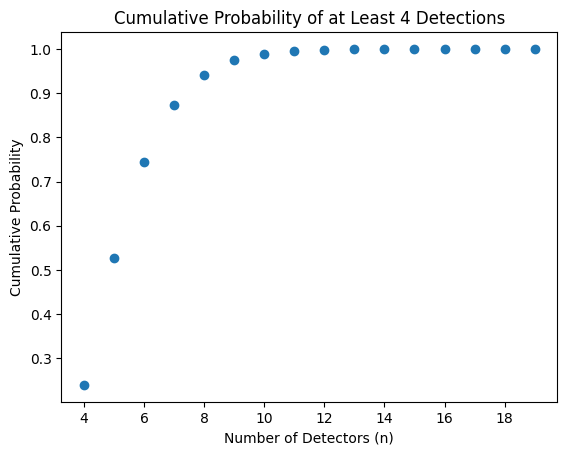

In [3]:
#Find the k
for k in range(0,20):
    if sum(binom.pmf(range(4, k+1), k, p)) > 0.99:
        print(sum(binom.pmf(range(4, k+1), k, p)))
        print(k)
        break



# Create an array of possible values of k (number of successes)
k_values = np.arange(4, 20)

# Calculate the cumulative probabilities using the binomial distribution PMF
cumulative_probabilities = [np.sum(binom.pmf(range(4, k+1),k, p)) for k in k_values]

# Plot the cumulative probabilities as points
plt.scatter(k_values, cumulative_probabilities)
plt.xlabel('Number of Detectors (n)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Probability of at Least 4 Detections')
plt.show()

Από το σχήμα φαίνεται ότι για να έχουμε τουλάχιστον 99\% πιθανότητα ανίχνευσης του σωματιδίου θα χρειαστούμε τουλάχιστον 11 ανιχνευτές, όπου έχουμε πιθανότητα $$P = 0.995709.$$

## Άσκηση 2

Να αποδείξετε ότι η χαρακτηριστική συνάρτηση της εκθετικής κατανομής με παράμετρο είναι $\phi (t) = \frac{\lambda}{\lambda - i t}$. Με τη βοήθεια της χαρακτηριστικής συνάρτησης να υπολογίσετε τις 4 πρώτες ροπές της εκθετικής κατανομής.

### Λύση

Για την εύρεση της χαρακτηριστικής συνάρτησης της εκθετικής κατανομής, για συνεχή μεταβλητή, έχουμε

In [4]:
# Define symbols and parameters
t, λ, x, n = sp.symbols('t λ x n', real=True, positive=True)  # t is the argument, λ is the rate parameter

# Define the exponential distribution's PDF
pdf = λ * sp.exp(-λ * x)
# Compute the expected value of e^(itx) with respect to the PDF
char_function = sp.integrate(sp.exp(sp.I * t * x) * pdf, (x, 0, sp.oo)).simplify()
char_function

-λ/(I*t - λ)

$$
\phi (t) = \int_0 ^\infty e^{i t x} \lambda e^{- \lambda x} \,dx
\\
= \lambda \int_0 ^{\infty} e^{i t x - \lambda x}dx
\\
= \lambda \int_0 ^{\infty} e^{-x(\lambda -i t   )}dx 
\\
= \left.\lambda \frac{e^{-x(\lambda -i t )}}{- (\lambda - i t)}\right\vert_0 ^{\infty} 
\\
= -\frac{\lambda}{- (\lambda - i t)} \{e^{-\infty} - e^0 \}
\\
= \frac{\lambda}{(\lambda - i t)} \{e^{-\infty} - e^0 \}

= \lambda (\lambda - it)^{-1}
$$

Η σύνδεση με τις ροπές έχει ως εξής

$$ \mu_n ' = \left.\frac{1}{i^n} \frac{d^n \phi (t)}{d t^n} \right \vert_{t=0} $$

Έτσι για τις τέσσερεις πρώτες ροπές της εκθετικής κατανομής.

In [5]:
def torque(n):
    return 1/(sp.I ** n) * sp.diff(char_function,t, n).subs(t,0)

for i in range(0,4):
    print(f'Torque of order {i}:',torque(i))

Torque of order 0: 1
Torque of order 1: 1/λ
Torque of order 2: 2/λ**2
Torque of order 3: 6/λ**3


## Άσκηση 3

Έστω η συνεχής τυχαία μεταβλητή $X,x \in [0, + \infty)$, η οποία ακολουθεί την κατανομή Weibull με πυκνότητα πιθανότητας
$$  f(x;k, \lambda) = \frac{k}{\lambda} \left(\frac{x}{\lambda} \right)^{k-1} e^{-\left(\frac{x}{\lambda}\right)^k}, $$
για $k = 2$, $\lambda = 1$.
\item Να παράξετε ένα τυχαίο δείγμα Σ από 1000 τιμές της τυχαίας μεταβλητής.
1. Από το τυχαίο δείγμα Σ να υπολογίσετε τις 4 πρώτες ροπές της κατανομής.
2. Χρησιμοποιώντας τις ροπές του ερωτήματος b, να γράψετε μία προσέγγιση $\hat{\phi}(t)$ της χαρακτηριστικής συνάρτησης της κατανομής και από αυτή να εξάγετε μια προσέγγιση $\hat{f}(x)$ της πυκνότητας πιθανότητας.
3. Να παραστήσετε την πυκνότητα πιθανότητας του Σ υπό τη μορφή ιστογράμματος και να ζωγραφίσετε στο ίδιο διάγραμμα τις $\hat{f}(x)$ και $f(x)$

### Λύση

Έχοντας την PDF της κατανομής Weibull, υπό τη μορφή
$$ f(x;2,1) = \left\{ 
\begin{array}{rcl}
2xe^{-x^2} & ,x>0  \\ 
0          & ,x \leq 0
\end{array}\right. $$

παράγουμε δείγμα με 1000 τιμές της τυχαίας μεταβλητής,

In [6]:
# Define the parameters of the Weibull distribution
weib_k = 2.0  # Shape parameter
weib_lambda = 1.0  # Scale parameter

# Generate 1000 random numbers from the Weibull distribution
random_numbers = np.random.weibull(weib_k, size=1000) * weib_lambda

#Weibull pdf
x = np.linspace(min(random_numbers), max(random_numbers), 1000)  # Values for x-axis
weibull_pdf = weibull_min.pdf(x, weib_k, scale=weib_lambda)

όπως φαίνεται στο σχήμα,

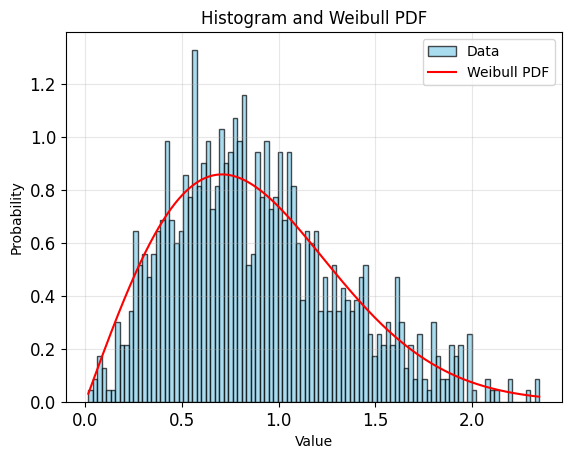

In [7]:
plt.hist(random_numbers, density = True,bins=100, color='skyblue', edgecolor='black', alpha=0.7, label = 'Data')
plt.plot(x,weibull_pdf,color = 'red', label='Weibull PDF')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.title('Histogram and Weibull PDF')
plt.grid(True, alpha=0.3)  # Add grid lines with transparency
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

και υπολογίζουμε τις 4 πρώτες ροπές, βασιζόμενοι στον τύπο για τη ροπή τάξης $n$,
$$ \mu'_n = E[X^n], $$
και καταλήγουμε

In [8]:
def weib_torque(n):
    return np.mean(random_numbers**n)
for n in range(0,4):
    print(f'Torque of order {n}: ',weib_torque(n))

Torque of order 0:  1.0
Torque of order 1:  0.8915871377509036
Torque of order 2:  0.9913220454635701
Torque of order 3:  1.2865636981604205


Έχοντας υπολογίσει τις ροπές, μπορούμε τώρα να προσεγγίσουμε την χαρακτηριστική συνάρτηση $\hat{\phi}(t)$ της κατανομής, γνωρίζοντας τη σύνδεση της με τις ροπές,
$$    \hat{\phi}(t) = \sum_{n=0}^{\infty} \frac{(i t)^n}{n!} \mu'_n 
$$

In [9]:
# Define symbolic variables
t, n = sp.symbols('t n')
phi_t = sp.summation((sp.I * t)**n/sp.factorial(n)*weib_torque(n),(n,0,3))
phi_t

-0.214427283026737*I*t**3 - 0.495661022731785*t**2 + 0.891587137750902*I*t + 1

Έτσι τώρα πλοτάρουμε την $\hat{\phi}(t)$ και τη συγκρίνουμε με την χαρακτηριστική συνάρτηση της κατανομής

In [10]:
# Create lambdified functions for real and imaginary parts
phi_t_real = sp.lambdify(t, sp.re(phi_t), 'numpy')
phi_t_imag = sp.lambdify(t, sp.im(phi_t), 'numpy')


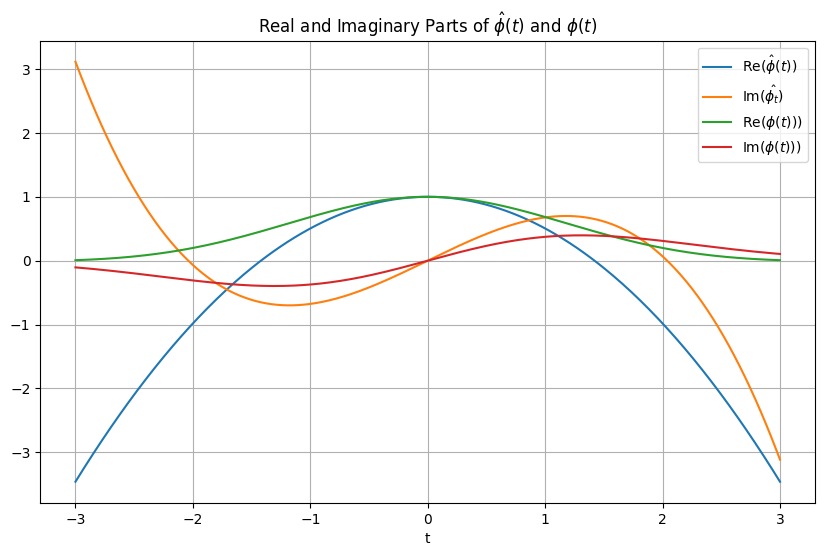

In [11]:
# Generate a range of t values
t_values = np.linspace(-3, 3, 400)

# Calculate real and imaginary parts of phi_t and cf for each t value
real_parts1 = phi_t_real(t_values)
imag_parts1 = phi_t_imag(t_values)

# Calculate the real and imaginary parts of the characteristic function
real_parts2 = np.exp(-0.25 * t_values**2) * np.cos(0.5 * t_values)  # Real part
imag_parts2 = np.exp(-0.25 * t_values**2) * np.sin(0.5 * t_values)  # Imaginary part

# Plot real and imaginary parts separately
plt.figure(figsize=(10, 6))

plt.plot(t_values, real_parts1, label='Re($\hat{\phi}(t)$)')
plt.plot(t_values, imag_parts1, label='Im($\hat{\phi_t}$)')
plt.plot(t_values, real_parts2, label='Re($\phi(t)$))')
plt.plot(t_values, imag_parts2, label='Im($\phi(t)$))')

plt.xlabel('t')
plt.ylabel('')
plt.title('Real and Imaginary Parts of $\hat{\phi}(t)$ and $\phi(t)$')
plt.legend()
plt.grid(True)
plt.show()

## Άσκηση 4

Θεωρήστε Ν ανεξάρτητα δείγματα της συνεχούς τυχαίας μεταβλητής $X$ που ακολουθεί την εκθετική κατανομή με $\lambda = 2$ και της $Y$ που ακολουθεί την ομοιόμορφη κατανομή στο διάστημα $[0,4]$. Να εκτελέσετε 10000 δοκιμές όπου επιλέγετε τυχαία Ν δείγματα από κάθε μεταβλητή και υπολογίζετε τις ποσότητες $ \bar{x} = \frac{1}{N} \sum_{i = 1}^{N}x_i$ και $ \bar{y} = \frac{1}{N} \sum_{i = 1}^{N}y_i$. Να επαναλάβετε για Ν = 2, 20, 200 και να παραστήσετε τα ιστογράμματα $\bar{x}$ και $\bar{y}$ (κοινό διάγραμμα για όλες τις τιμές του N). Υπολογίστε σε κάθε περίπτωση την τυπική απόκλιση της κατανομής των $\bar{x},\bar{y}$ και σχολιάστε το αποτέλεσμα.

### Λύση

Αρχικά παράγουμε 10.000 ανεξάρτητα δείγματα για την μεταβλητή $X$ που ακολουθεί την εκθετική κατανομή,
$$f(x;\lambda) = \lambda e^{- \lambda x}$$

In [12]:
N = [2,20,200]

def expo_rand_data(number):
    lambda1 = 2
    rands = []
    for n in range(0,10000):
        random_numbers = np.random.exponential(lambda1,size = number)
        meanX = np.mean(random_numbers)
        rands = np.append(rands, meanX)
    return rands, np.std(rands)
expo_data_2, expo_sigma2 = expo_rand_data(N[0])
expo_data_20, expo_sigma20 = expo_rand_data(N[1])
expo_data_200, expo_sigma200 = expo_rand_data(N[2])

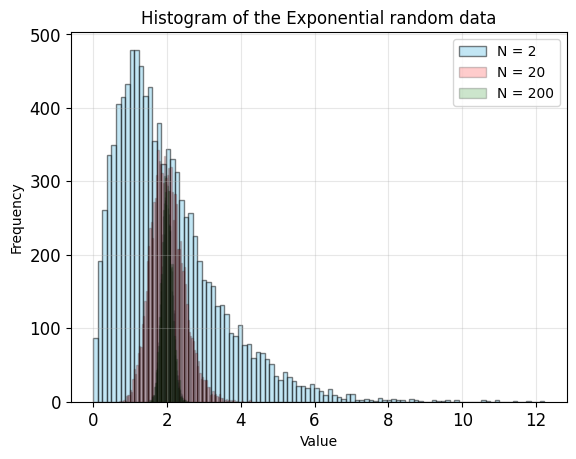

In [13]:
plt.hist(expo_data_2, density = False,bins=100, color='skyblue', edgecolor='black', alpha=0.5, label = 'N = 2')
plt.hist(expo_data_20, density = False,bins=100, color='red', edgecolor='black', alpha=0.2, label = 'N = 20')
plt.hist(expo_data_200, density = False,bins=100, color='green', edgecolor='black', alpha=0.2, label = 'N = 200')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of the Exponential random data')
plt.grid(True, alpha=0.3)  # Add grid lines with transparency
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Η τυπική απόκλιση των μέσων τιμών του $X$ για κάθε τιμή του Ν είναι

In [14]:
print('For N = 2, sigma =', expo_sigma2)
print('For N = 20, sigma =', expo_sigma20)
print('For N = 200, sigma =', expo_sigma200)

For N = 2, sigma = 1.397254753189748
For N = 20, sigma = 0.4434307935463313
For N = 200, sigma = 0.1423417915712954


Το ίδιο κάνουμε τώρα και για την $Y$ που ακολουθεί την ομοιόμορφη κατανομή,
$$
 f(x) = 
    \left\{ \begin{array}{rc}
\frac{1}{b-\alpha} & x \in [\alpha,b]
\\ 
0 & x \notin [\alpha,b]
\end{array}\right.
$$

In [15]:
def uni_rand_data(number):
    lambda1 = 2
    rands = []
    for n in range(0,10000):
        random_numbers = np.random.uniform(0,4,size = number)
        meanX = np.mean(random_numbers)
        rands = np.append(rands, meanX)
    return rands, np.std(rands)
uni_data_2, uni_sigma2 = uni_rand_data(N[0])
uni_data_20, uni_sigma20 = uni_rand_data(N[1])
uni_data_200, uni_sigma200 = uni_rand_data(N[2])

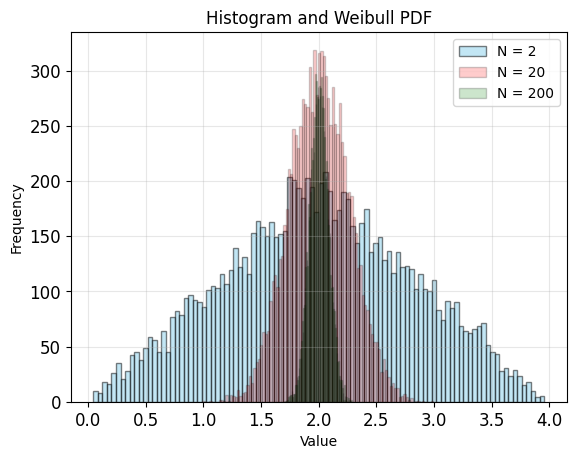

In [16]:
plt.hist(uni_data_2, density = False,bins=100, color='skyblue', edgecolor='black', alpha=0.5, label = 'N = 2')
plt.hist(uni_data_20, density = False,bins=100, color='red', edgecolor='black', alpha=0.2, label = 'N = 20')
plt.hist(uni_data_200, density = False,bins=100, color='green', edgecolor='black', alpha=0.2, label = 'N = 200')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram and Weibull PDF')
plt.grid(True, alpha=0.3)  # Add grid lines with transparency
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Η τυπική απόκλιση των μέσων τιμών του $Y$ για κάθε τιμή του Ν είναι

In [ ]:
print('For N = 2, sigma =', uni_sigma2)
print('For N = 20, sigma =', uni_sigma20)
print('For N = 200, sigma =', uni_sigma200)

For N = 2, sigma = 0.8183034960896157
For N = 20, sigma = 0.25803180248037993
For N = 200, sigma = 0.08154808270941749


Από τα δύο ιστογράμματα παρατηρούμε ότι, όσο το Ν αυξάνεται ο αριθμητικό μέσος όρος κάθε κατανομής, προσεγγίζει την κανονική κατανομή. Τα αποτελέσματα μας δηλαδή συμφωνούν με το Κεντρικό Οριακό Θεώρημα.

Όταν υπολογίζετε τις τυπικές αποκλίσεις για τα ίδια μεγέθη δείγματος χρησιμοποιώντας την ομοιόμορφη κατανομή, ενδέχεται να παρατηρήσετε ότι τα σίγμα πέφτουν πιο γρήγορα σε σύγκριση με την εκθετική κατανομή. Αυτή η συμπεριφορά είναι συνεπής με τις ιδιότητες του κεντρικού οριακού θεωρήματος (CLT).

Το CLT αναφέρει ότι η κατανομή του αθροίσματος (ή του μέσου όρου) ενός μεγάλου αριθμού ανεξάρτητων και πανομοιότυπα κατανεμημένων τυχαίων μεταβλητών τείνει προς μια κανονική κατανομή, ανεξάρτητα από την αρχική κατανομή των μεταβλητών. Ωστόσο, ο ρυθμός με τον οποίο η κατανομή προσεγγίζει την κανονικότητα εξαρτάται από τα χαρακτηριστικά της αρχικής κατανομής.

Για μια ομοιόμορφη κατανομή, η οποία έχει πεπερασμένη υποστήριξη και περιορισμένο εύρος, το άθροισμα των τυχαίων μεταβλητών συγκλίνει στην κανονικότητα σχετικά γρήγορα καθώς το μέγεθος του δείγματος (Ν) αυξάνεται. Αυτό συμβαίνει επειδή η ομοιόμορφη κατανομή έχει ήδη κάπως «σχήμα καμπάνας» λόγω του οριοθετημένου εύρους της.

Από την άλλη πλευρά, η εκθετική κατανομή, η οποία έχει μια λοξή και απεριόριστη φύση, χρειάζεται περισσότερο χρόνο για να συγκλίνει στην κανονικότητα κάτω από το CLT. Η εκθετική κατανομή έχει βαρύτερη ουρά και το άθροισμά της θα απαιτήσει μεγαλύτερο μέγεθος δείγματος για να κάνει το CLT αποτελεσματικά την κατανομή του αθροίσματος πιο κανονική.

Συνοπτικά, η διαφορά στο πόσο γρήγορα πέφτουν τα σίγμα όταν χρησιμοποιείται η ομοιόμορφη κατανομή σε σύγκριση με την εκθετική κατανομή επηρεάζεται από τα εγγενή χαρακτηριστικά των ίδιων των κατανομών και από το πόσο γρήγορα το CLT συγκλίνει στην κανονικότητα με βάση αυτά τα χαρακτηριστικά.

## 'Ασκηση 5

Να υπολογίσετε με τη μέθοδο \tl{Monte Carlo} το ολοκλήρωμα $I = \int \int_{\Omega} x^3 y dx dy $, όπου $\Omega$ είναι το χωρίο του επιπέδου $x-y$ όπου $x^2 + y^2 \leq 4$, $x,y \geq 0$. (Υπόδειξη: τα ζεύγη $x,y$ στο χωρίο $\Omega$ μπορούν να παραχθούν σε πολικές συντεταγμένες). Χρησιμοποιήστε $Ν=5, 50, 200, 500$ σημεία και επαναλάβετε 10000 φορές για κάθε τιμή του Ν. Να παραστήσετε γραφικά τις κατανομές (ιστογράμματα) των 10000 δοκιμών της ποσότητας $I_N$ και να υπολογίσετε τις αντίστοιχες μέσες τιμές $\mu_N = E[I_N]$ και τις τυπικές αποκλίσεις $\sigma_N = \sqrt{Var[I_N]}$. Τέλος να παραστήσετε γραφικά τα $\mu_N$ συναρτήσει του N ως σημεία με σφάλμα $\sigma_N$. Στο ίδιο διάγραμμα να ζωγραφίσετε και την ευθεία που αντιστοιχεί στην αναλυτική τιμή του ολοκληρώματος (μπορείτε να χρησιμοποιήσετε τον σύνδεσμο [εδώ](https://www.symbolab.com/solver/double-integrals-calculator). Σχολιάστε το αποτέλεσμα. Επίσης να ζωγραφίσετε την ποσότητα $\frac{\sigma_N}{\mu_N}$ συναρτήσει του Ν. Πόσα σημεία
Ν απαιτούνται (κατά προσέγγιση) για να επιτύχουμε τυπική απόκλιση μικρότερη του 1\% της μέσης τιμής?

### Λύση

Αρχικά παράγουμε τυχαία σημεία στο $x-y$ επίπεδο, έχοντας υπ'όψιν ότι $x^2 + y^2 \leq 4$ και $x,y \geq 0$ (1ο τεταρτημόριο). Τα τυχαία σημεία από την ομοιόμορφη κατανομή είναι

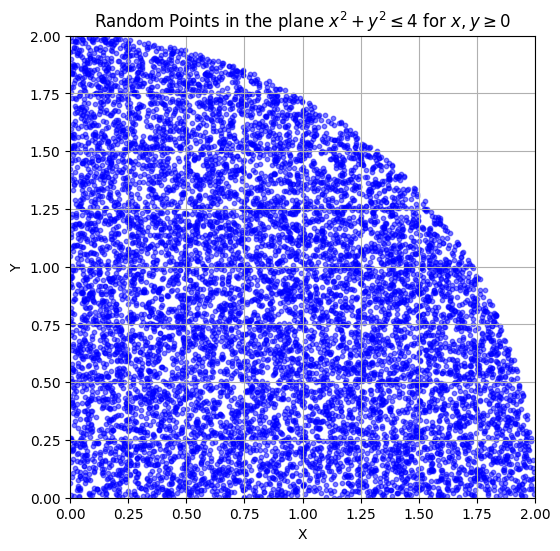

In [ ]:
# Number of random points
num_points = 10000

# Generate random angles (between 0 and 2*pi)
angles = np.random.uniform(0, np.pi/2, num_points)

# Generate random radii (between 0 and 2)
radii = np.sqrt(np.random.uniform(0, 4, num_points))  # Square root for uniform distribution within the circle

# Convert polar coordinates to Cartesian coordinates
x = radii * np.cos(angles)
y = radii * np.sin(angles)

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=10, color='blue', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points in the plane $x^2 + y^2 \leq 4$ for $x,y \geq 0$')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.grid(True)
plt.show()

Για τον υπολογισμό των ολοκληρωμάτων έχουμε
$$
    I_d = \int_{\Omega} f(\vec{x})d^d \vec{x} = \lim_{N \rightarrow \infty} \left[ \frac{V_d}{N} \sum_{k=0}^{N} f(\vec{x}_k)  \right] 
$$
όπου εδώ $d = 2$ διαστάσεις, $V_d = \int_{\Omega} d^2 \vec{x} = \pi$ το εμβαδόν και $\vec{x}_k \equiv (\vec{x}_{1k},\vec{x}_{2k}) \in \Omega$. Έτσι τώρα αναπαράγουμε 10.000 φορές τον υπολογισμό για $N=5,50,200,500$ και έχουμε 

In [ ]:

def I_d(N):
    integrals = []
    for i in range(0,10000):
        # Number of random points
        num_points = N

        # Generate random angles (between 0 and 2*pi)
        angles = np.random.uniform(0, np.pi/2, num_points)

        # Generate random radii (between 0 and 2)
        radii = np.sqrt(np.random.uniform(0, 4, num_points))  # Square root for uniform distribution within the circle

        # Convert polar coordinates to Cartesian coordinates
        x = radii * np.cos(angles)
        y = radii * np.sin(angles)
    
        f = x**3 * y
        integral = np.pi/N * sum(f)
        integrals = np.append(integrals, integral)
    return  integrals, np.mean(integrals), np.std(integrals)
I_ds5, I_ds5mean, I_ds5_sigma = I_d(5)
I_ds50, I_ds50mean, I_ds50_sigma = I_d(50)
I_ds200, I_ds200mean, I_ds200_sigma = I_d(200)
I_ds500, I_ds500mean, I_ds500_sigma = I_d(500)

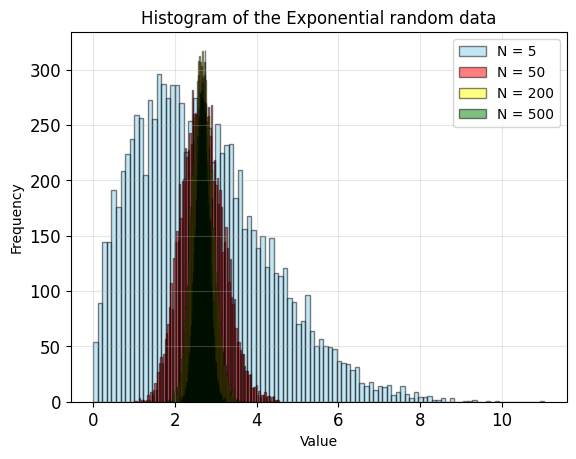

In [ ]:
plt.hist(I_ds5, density = False,bins=100, color='skyblue', edgecolor='black', alpha=0.5, label = 'N = 5')
plt.hist(I_ds50, density = False,bins=100, color='red', edgecolor='black', alpha=0.5, label = 'N = 50')
plt.hist(I_ds200, density = False,bins=100, color='yellow', edgecolor='black', alpha=0.5, label = 'N = 200')
plt.hist(I_ds500, density = False,bins=100, color='green', edgecolor='black', alpha=0.5, label = 'N = 500')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of the Exponential random data')
plt.grid(True, alpha=0.3)  # Add grid lines with transparency
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
print('For N = 5, I_d = ', I_ds5mean)
print('For N = 50, I_d = ', I_ds50mean)
print('For N = 200, I_d = ', I_ds200mean)
print('For N = 500, I_d = ', I_ds500mean)

For N = 5, I_d =  2.673978067592184
For N = 50, I_d =  2.667682716894467
For N = 200, I_d =  2.6676875301792164
For N = 500, I_d =  2.665063108767714


καταλαβαίνουμε ότι όσο αυξάνεται το $Ν$, τόσο η κατανομή θα έχει ως μέση τιμή την πραγματική τιμή του ολοκληρώματος.

Τώρα υπολογίζουμε την πραγματική τιμή του ολοκληρώματος,

In [ ]:
# Define symbolic variables
x, y = sp.symbols('x y')

# Define the region of integration
region = sp.And(x**2 + y**2 <= 4, x >= 0, y >= 0)

# Define the integrand
integrand = x**3 * y

# Calculate the double integral over the region
result = sp.integrate(integrand, (x, 0, sp.sqrt(4 - y**2)), (y, 0, 2))

print("Result of the double integral:", float(result))

Result of the double integral: 2.6666666666666665


Με βάση τα δεδομένα που φαίνονται στα ιστογράμματα, μπορούμε να βρούμε τις μέσες τιμές και τις τυπικές αποκλίσεις των ολοκληρωμάτων για κάθε $Ν$

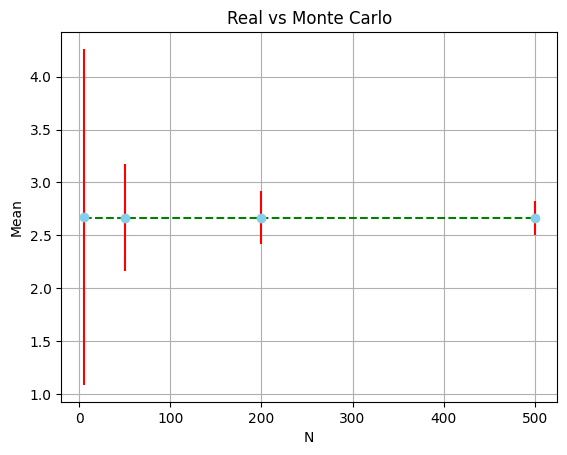

In [ ]:
Ns = [5, 50, 200, 500]
means = [I_ds5mean, I_ds50mean, I_ds200mean, I_ds500mean]
sigmas = [I_ds5_sigma, I_ds50_sigma, I_ds200_sigma, I_ds500_sigma]

plt.errorbar(Ns, means, yerr=sigmas, fmt='o', ecolor='red', color = 'skyblue')
plt.plot(Ns,[result] * len(Ns), '--', color='green', label='Real Value') 
plt.xlabel('N')
plt.ylabel('Mean')
plt.title('Real vs Monte Carlo')
plt.grid(True)
plt.show()

Το γράφημα συμφωνεί με τη θεωρία, καθώς η τιμή του ολοκληρώματος είναι τυχαία μεταβλητή με μέση τιμή την πραγματική τιμή του, πράγμα που ισχύει ακόμα και για τη περίπτωση του $Ν=5$. Εκτός αυτού η διασπορά της τιμής μειώνεται όσο αυξάνεται το μέγεθος της δειγματοληψίας.

Ακόμη μπορούμε να παραστήσουμε γραφικά τη ποσότητα $\frac{\sigma_N}{\mu_N}$ συναρτήσει του $N$

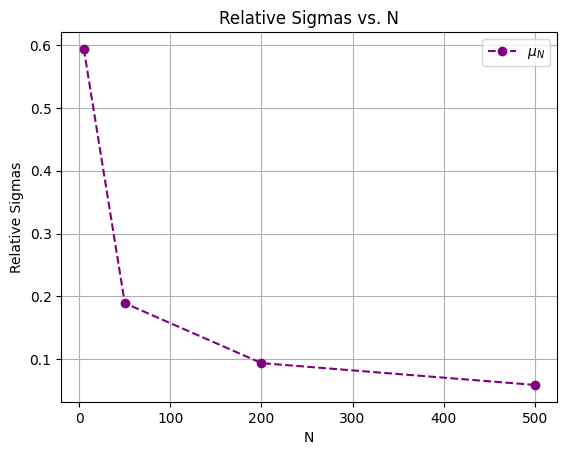

In [ ]:
plt.plot(Ns,np.array(sigmas)/np.array(means), marker= 'o', linestyle = '--' , color='purple',label = '$\mu_N$')
plt.xlabel('N')
plt.ylabel('Relative Sigmas')
plt.title('Relative Sigmas vs. N')
plt.grid(True)
plt.legend()
plt.show()

όπου διακρίνουμε ότι τα σημεία ακολουθούν μία συνάρτηση της μορφής $\exp{(-x)}$. Έτσι αν λογαριθμήσουμε με βάση το $e$ και κάνουμε \tl{Linear fit} στα δεδομένα έχουμε

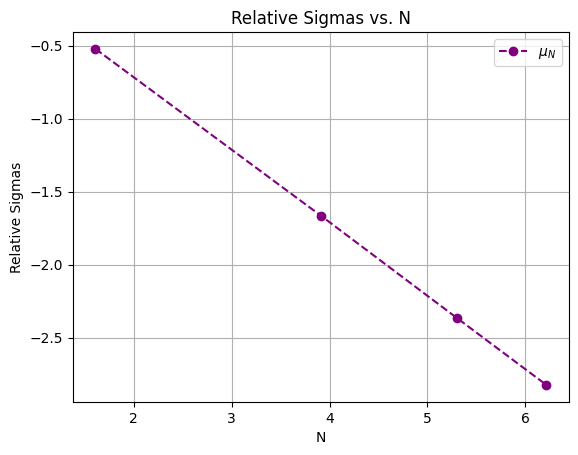

In [ ]:
plt.plot(np.log(Ns),np.log(np.array(sigmas)/np.array(means)), marker= 'o', linestyle = '--' , color='purple',label = '$\mu_N$')
plt.xlabel('N')
plt.ylabel('Relative Sigmas')
plt.title('Relative Sigmas vs. N')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
Ns = [5, 50, 200, 500]
means = [I_ds5mean, I_ds50mean, I_ds200mean, I_ds500mean]
sigmas = [I_ds5_sigma, I_ds50_sigma, I_ds200_sigma, I_ds500_sigma]

# Calculate log values
x_values = np.logs)
y_values = np.logp.array(sigmas) / np.array(means))

# Perform linear fit (1st degree polynomial)
coefficients = np.polyfit(x_values, y_values, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Generate x values for fitted line
x = np.linspace(0, 5, 1000)
fitted_line = slope * x + intercept

# Analytic expression of the linear fit
linear_fit_expression = f'y = {slope:.2f}x + {intercept:.2f}'
desired_y = np.log(0.01)

# Create the plot
plt.plot(x, fitted_line, color='red', label=linear_fit_expression)
plt.scatter(x_values, y_values, color='blue', label='Data Points', zorder=2)  # Set zorder for scatter plot
plt.scatter((desired_y - intercept) / slope, desired_y, color='green', label='$\sigma \sim 1\%$', zorder=3)  # Set zorder for scatter plot
plt.xlabel('log(N)')
plt.ylabel('log($\sigma$/$\mu$)')
plt.title('Linear Fit of Data')
plt.legend()
plt.grid(True)
plt.show()


SyntaxError: unmatched ')' (212702228.py, line 10)

Από την τομή των δύο ευθειών συμπαιρένουμε ότι για

In [ ]:
print('For sigma <1%, we need N = ', int(10**((desired_y - intercept) / slope)))

For sigma <1%, we need N =  17807


μπορούμε να επιτύχουμε τυπική απόκλιση μικρότερη του $1\%$.

## Άσκηση 6

Έστω οι τυχαίες μεταβλητές $X,Y$ που ακολουθούν διδιάστατη κανονική κατανομή $f(x,y)$ με μέσες τιμές $(2,1)$, τυπικές αποκλίσεις (1, 4) και συντελεστή συσχέτισης $\rho = + 0.5$. Να παράξετε ένα σύνολο 1000 (ψευδο)τυχαίων ζευγών $(x,y)$ από την κατανομή αυτή χρησιμοποιώντας τον αλγόριθμο Metropolis-Hastings και να το αποτυπώσετε σε ένα διάγραμμα $x-y$ (scatter plot). Επιβεβαιώστε ότι οι μέσες τιμές και ο πίνακας διασποράς του δείγματος που παράξατε είναι συμβατά με τη θεωρητική κατανομή. Χρησιμοποιήστε κανονική συνάρτηση μεταφοράς
$$    
T(x_{m+1}\vert x_m) = \frac{1}{\sqrt{2 \pi} \sigma} \exp{\left[ -\frac{1}{2 \sigma^2} (x_{m+1}- x_m)^2 \right]}
$$
με παράμετρο $\sigma$ της επιλογής σας. Να παράξετε τα διαγράμματα αυτοσυσχέτισης για διάφορες τιμές του $\sigma$ και να τα συγκρίνετε μεταξύ τους. Αξιολογήστε τον αριθμό των αρχικών δειγμάτων που πρέπει να “πετάξετε” καθώς και τον αριθμό των δειγμάτων που πρέπει να “παρακάμψετε” μέχρι να χαθεί η αυτοσυσχέτιση σε κάθε περίπτωση.

### Λύση

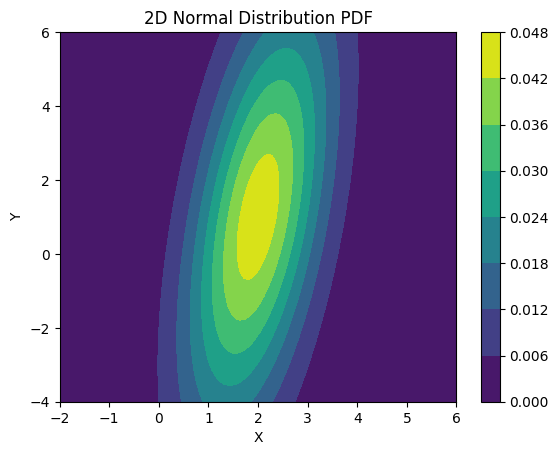

In [ ]:
num_points = 100000
# Parameters of the normal distribution

rho = 0.5
mean = [2, 1]
stdv = [1, 4]
covariance = [[stdv[0]**2, rho*stdv[0]*stdv[1]], [rho*stdv[0]*stdv[1], stdv[1]**2]]  # Covariance matrix

# Create a grid of points
x = np.linspace(-2, 6, 100)
y = np.linspace(-4, 6, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Create a multivariate normal distribution
pdf = multivariate_normal(mean, covariance)

# Calculate the PDF values for the grid points
Z = pdf.pdf(pos)

# Create a contour plot of the PDF
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Normal Distribution PDF')
plt.show()


Αρχικά παράγουμε 100.000 σημεία, θεωρώντας $\sigma = 0.5 \sigma_{X,Y}$, και σχεδιάζουμε το γράφημα αυτοσυσχέτισης $R(k)$,

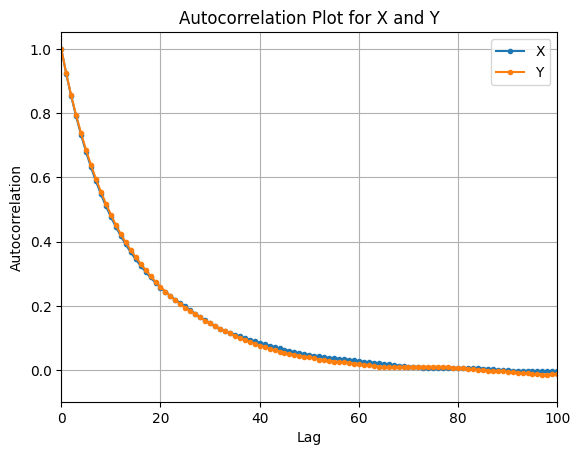

In [ ]:
prop_sigma_factor = 0.5  # Proposal standard deviation factor
def MCMC(prop_sigma_factor):
    # Parameters of the target normal distribution
    mean = [2, 1]
    covariance = [[1, 2], [2, 16]]  # Covariance matrix
    rho = 0.5
    # Number of iterations and initial point
    num_iterations = 100000
    initial_point = [0, 0]

    # Initialize variables to store samples and accepted samples
    samples = np.zeros((num_iterations, 2))
    accepted_samples = np.zeros((num_iterations, 2))

    # Create a multivariate normal distribution
    pdf = multivariate_normal(mean, covariance)

    # Metropolis-Hastings algorithm
    current_sample = initial_point
    for i in range(num_iterations):
        # Propose a new sample from a normal distribution
        prop_sigma = [prop_sigma_factor * covariance[0][0]**0.5, prop_sigma_factor * covariance[1][1]**0.5]
        proposal_sample = current_sample + np.random.normal(scale=prop_sigma, size=2)
    
        # Calculate the acceptance ratio
        acceptance_ratio = pdf.pdf(proposal_sample) / pdf.pdf(current_sample)
    
        # Accept the new sample with probability min(acceptance_ratio, 1)
        if np.random.uniform() < acceptance_ratio:
            current_sample = proposal_sample
            accepted_samples[i] = current_sample
        else:
            accepted_samples[i] = current_sample
    
        samples[i] = current_sample
    return samples
accepted_samples = MCMC(prop_sigma_factor)

# Calculate the autocorrelation for X and Y coordinates
def R_k(samples):
    n = len(samples)
    mu = np.mean(samples)
    gamma = np.correlate(samples - mu, samples - mu, mode='full') / (n * np.var(samples))
    return gamma[n - 1:]

# Calculate autocorrelation for X and Y separately
gamma_x = R_k(accepted_samples[:, 0])
gamma_y = R_k(accepted_samples[:, 1])

# Plot autocorrelation for X and Y
plt.plot(gamma_x, label='X',marker = '.')
plt.plot(gamma_y, label='Y',marker = '.')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for X and Y')
plt.legend()
plt.xlim(0,100)
plt.grid(True)
plt.xlim(0,100)
plt.show()


Το οποίο φαίνεται να μηδενίζει για $k \sim 60$, δηλαδή θα κρατήσουμε ένα σημείο ανά 80, έχοντα πετάξει κάποια αρχικά, για να χαθεί η αυτοσυσχέτιση. Έτσι έχουμε

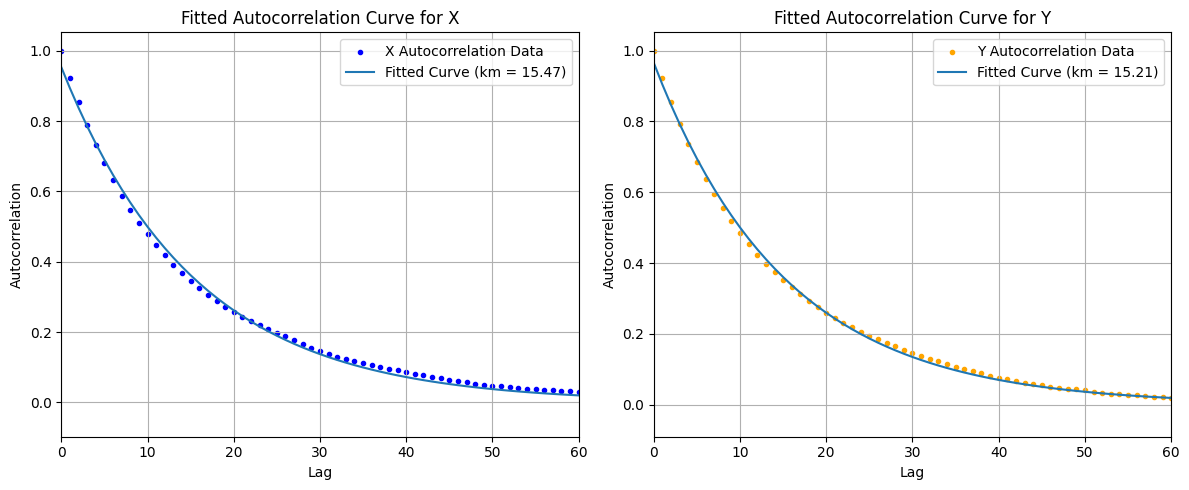

Fitted km for X: 15.47
Fitted km for Y: 15.21


In [ ]:
# Fit function: R0 * exp(-k / km)
def fit_function(k, R0, km):
    return R0 * np.exp(-k / km)

# Fit the X and Y autocorrelation data separately
popt_x, covariance_x = curve_fit(fit_function, np.arange(len(gamma_x)), gamma_x)
popt_y, covariance_y = curve_fit(fit_function, np.arange(len(gamma_y)), gamma_y)


# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the X autocorrelation data as dots and its fitted curve
axs[0].scatter(np.arange(len(gamma_x)), gamma_x, marker='.', color='blue', label='X Autocorrelation Data')
axs[0].plot(fit_function(np.arange(len(gamma_x)), *popt_x), label=f'Fitted Curve (km = {popt_x[1]:.2f})')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Autocorrelation')
axs[0].set_title('Fitted Autocorrelation Curve for X')
axs[0].legend()
axs[0].set_xlim(0, 60)
axs[0].grid(True)

# Plot the Y autocorrelation data as dots and its fitted curve
axs[1].scatter(np.arange(len(gamma_y)), gamma_y, marker='.', color='orange', label='Y Autocorrelation Data')
axs[1].plot(fit_function(np.arange(len(gamma_y)), *popt_y), label=f'Fitted Curve (km = {popt_y[1]:.2f})')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Autocorrelation')
axs[1].set_title('Fitted Autocorrelation Curve for Y')
axs[1].legend()
axs[1].set_xlim(0, 60)
axs[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

print(f"Fitted km for X: {popt_x[1]:.2f}")
print(f"Fitted km for Y: {popt_y[1]:.2f}")

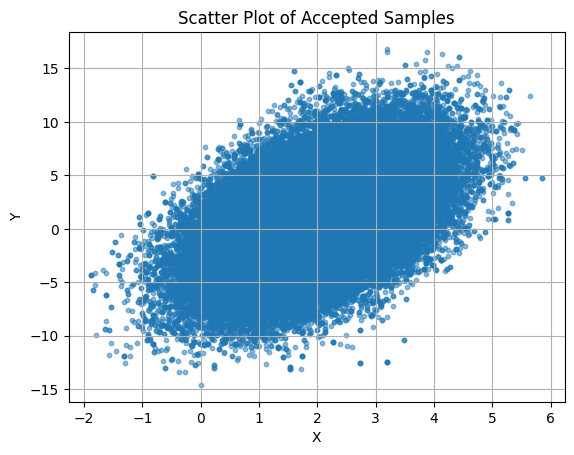

In [ ]:
# Plot the scatter plot of accepted samples
plt.scatter(accepted_samples[:, 0], accepted_samples[:, 1], s=10, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Accepted Samples')
plt.grid(True)
plt.show()

Από τα δεδομένα έχουμε ότι οι μέσες τιμές είναι

In [ ]:
print('Mean Value of X is: ', np.mean(accepted_samples[:,0]))
print('Mean Value of Y is: ', np.mean(accepted_samples[:,1]))

Mean Value of X is:  1.9931610881025956
Mean Value of Y is:  0.9740891984543085


με τυπικές αποκλίσεις

In [ ]:
print('Stdv of X is: ', np.std(accepted_samples[:,0]))
print('Stdv Value of Y is: ', np.std(accepted_samples[:,1]))

Stdv of X is:  0.9878015479221571
Stdv Value of Y is:  3.9774596285815775


In [ ]:
# Assuming accepted_samples is an array with shape (num_samples, num_variables)
covariance_matrix = np.cov(accepted_samples, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[ 0.97576166  1.97079448]
 [ 1.97079448 15.8203433 ]]


Τέλος πλοτάρουμε την καμπύλη αυτοσυσχέτισης για διάφορα $k$

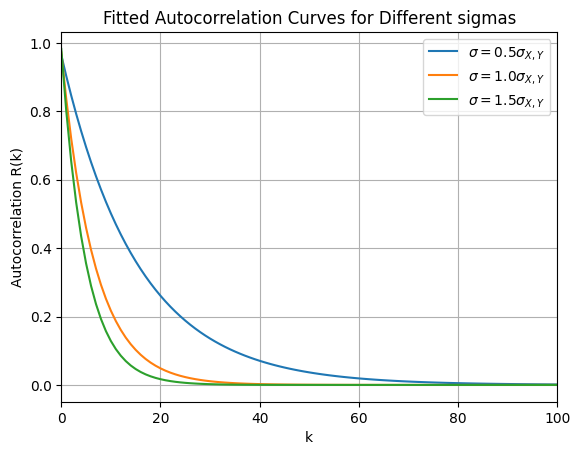

In [ ]:
prop_sigma_factors = [0.5, 1, 1.5]
legend_labels = []

for prop_sigma_factor in prop_sigma_factors:
    
    accepted_samples = MCMC(prop_sigma_factor)
    gamma_x = R_k(accepted_samples[:, 0])
    popt_x, _ = curve_fit(fit_function, np.arange(len(gamma_x)), gamma_x)
    plt.plot(fit_function(np.arange(len(gamma_x)), *popt_x))
    legend_labels.append('$\sigma = $'+ f'{prop_sigma_factor:.1f}' + '$\sigma_{X,Y}$')

plt.legend(legend_labels)
plt.xlabel('k')
plt.ylabel('Autocorrelation R(k)')
plt.title('Fitted Autocorrelation Curves for Different sigmas')
plt.xlim(0, 100)
plt.grid(True)
plt.show()


# Έργασία 2

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Άσκηση 1

Έστω μία τυχαία μεταβλητή $X$ η οποία ακολουθεί την κατανομή Rayleigh, με
πυκνότητα πιθανότητας
$$
    f(x\vert \sigma) = \frac{x}{\sigma^2}e^{-x^2/ 2\sigma^2}, \quad x \geq 0
$$
και ένα σύνολο 10 ανεξαρτήτων τιμών αυτής της μεταβλητής
$$
    \Sigma = \{0.96, 1.12, 0.85, 1.02, 1.58, 1.86, 0.79, 0.82, 0.45, 1.52\}.
$$

1. Να βρείτε αναλυτικά την εκτίμηση $\hat{\sigma}$ της παραμέτρου $\sigma$ χρησιμοποιώντας τη μέθοδο μέγιστης πιθανοφάνειας.
2. Να υπολογίσετε το σφάλμα της εκτίμησής σας χρησιμοποιώντας την προσεγγιστική (Hessian) και την ακριβή μέθοδο.
3. Να παραστήσετε γραφικά τη συνάρτηση $\ln{L(\sigma)}$, όπου $L$ είναι η πιθανοφάνεια του δείγματος Σ και στο ίδιο διάγραμμα να δείξετε την παραβολική προσέγγιση στο σημείο του μεγίστου.

### Λύση

Η συνάρτηση Log Likelihood για τις τιμές της μεταβλητής $X$ είναι
$$
\ln{L\left( X \vert \sigma \right)} = \sum_{i=1}^{N} \ln{f(x\vert \sigma)}
$$
δηλαδή

In [ ]:
Sigma = [0.96, 1.12, 0.85, 1.02, 1.58, 1.86, 0.79, 0.82, 0.45, 1.52]
sigma, x = sp.symbols('\sigma x', positive=True)
f = x / sigma**2 * sp.exp(-x**2 / (2 * sigma**2))

In [ ]:
def Loglikelihood(data):
    lnL = 0
    for i in range(0,len(Sigma)):
        lnL += sp.ln(f.subs(x, Sigma[i]))
    return lnL.simplify()

lnL = Loglikelihood(Sigma)

Μεγιστοποιούμε το λογάριθμο του $L$, δεδομένου ότι ο λογάριθμος είναι
μονότονη συνάρτηση και εμφανίζει ακρότατο στην ίδια τιμή με το όρισμά της. Έτσι έχουμε

In [ ]:
def sigma_bar(Sigma):
    return sp.solve(Loglikelihood(Sigma).diff(sigma), sigma)
sigma_bar = sigma_bar(Sigma)[0]
sigma_bar

0.827777143922203

Τώρα θα υπολογίσουμε το σφάλμα της εκτίμησης, αρχικά με τη χρήση της Hessian και μετά με την ακριβή μέθοδο. Για τη πρώτη έχουμε
$$
H_{ij} = - \left.\frac{\partial^2 \ln{L} }{\partial \theta_{i} \partial \theta_j}\right\vert_{\bar{\theta} = \hat{\theta}}
$$
όπου στη δική μας περίπτωση έχουμε
$$
    H = - \left.
    \frac{d^2 \ln{L} }{d \sigma^2}\right\vert_{\sigma = \hat{\sigma}} 
$$

In [ ]:
def Hessian(Sigma,sigma_bar):
    return  -Loglikelihood(Sigma).diff(sigma).diff(sigma).subs(sigma, sigma_bar)
Hessian_val = Hessian(Sigma,sigma_bar)
Hessian_val

58.3758382405522

και έτσι προσεγγιστικά το σφάλμα της μεταβλητής $\sigma$ είναι 
$$
\sigma_{\hat{\sigma}} = \sqrt{H^{-1}}
$$

In [ ]:
stdv_sigma = sp.sqrt(1/Hessian_val)
stdv_sigma

0.130883058491158

ενώ η ακριβής μέθοδος δίνει
$$
\sigma_{\hat{\sigma}} = \frac{\sigma}{\sqrt{N}}
$$

In [ ]:
#ddof = degrees of freedom are set to 1, so that we calculate the sample stdv
stdv_sigma_ac = np.std(Sigma, ddof=1)/np.sqrt(len(Sigma)) 
stdv_sigma_ac

0.1362273426625099

απ'ότι φαίνεται οι δύο μέθοδοι διαφέρουν στο 3ο δεκαδικό. Έχοντας ήδη υπολογίσει τη Log Likelihood, μπορούμε να υπολογίσουμε και τη παραβολική προσέγγιση,

In [ ]:
def Parabolic_approx(Sigma,sigma_bar):
    return Loglikelihood(Sigma).subs(sigma, sigma_bar) - 0.5 * Hessian_val * (sigma - sigma_bar)**2 
lnL_par = Parabolic_approx(Sigma,sigma_bar)
lnL_par

-29.1879191202761*(\sigma - 0.827777143922203)**2 - 6.02595269672314

Έτσι πλοτάρουμε τις δύο συναρτήσεις,

<lambdifygenerated-7>:2: RuntimeWarning: divide by zero encountered in log
  return -20.0*log(Dummy_294) + 0.193821089744644 - 6.85215/Dummy_294**2
<lambdifygenerated-7>:2: RuntimeWarning: divide by zero encountered in divide
  return -20.0*log(Dummy_294) + 0.193821089744644 - 6.85215/Dummy_294**2
<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in subtract
  return -20.0*log(Dummy_294) + 0.193821089744644 - 6.85215/Dummy_294**2


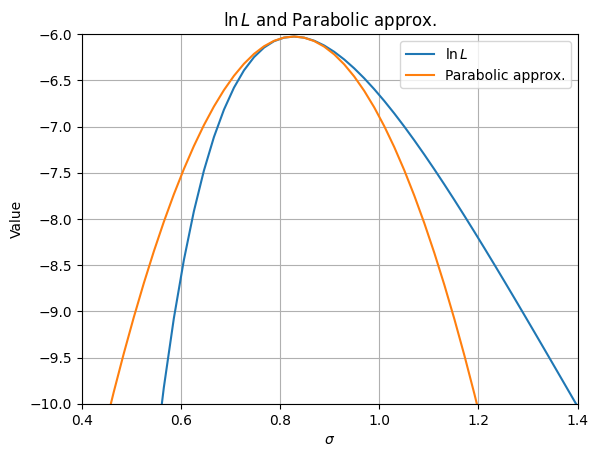

In [ ]:
# Convert SymPy expressions to NumPy functions
lnL_func = sp.lambdify(sigma, lnL, "numpy")
lnL_par_func = sp.lambdify(sigma, lnL_par, "numpy")

# Create an array of sigma values for plotting
sigma_values = np.linspace(0, 2, 100)

# Evaluate the expressions for lnL and lnL_par at sigma values
lnL_values = lnL_func(sigma_values)
lnL_par_values = lnL_par_func(sigma_values)

# Plot lnL and lnL_par
plt.plot(sigma_values, lnL_values, label='$\ln{L}$')
plt.plot(sigma_values, lnL_par_values, label='Parabolic approx.')
plt.xlabel('$\sigma$')
plt.ylabel('Value')
plt.title('$\ln{L}$ and Parabolic approx.')
plt.xlim(0.4,1.4)
plt.ylim(-10,-6)
plt.legend()
plt.grid(True)
plt.show()

## Άσκηση 2

Θεωρήστε την κατανομή Poisson με παράμετρο μ = 4.
1. Να παράξετε Ν = 10, 20, 50 τυχαίους αριθμούς από αυτή την κατανομή.
2. Για κάθε σύνολο αριθμών του ερωτήματος (1) να υπολογίσετε την εκτίμηση μέγιστης πιθανοφάνειας $\hat{\mu} \pm \sigma_{\hat{\mu}}$ και να παραστήσετε γραφικά τη συνάρτηση $\ln{L(\mu)} - \ln{L(\hat{\mu})}$ (στο ίδιο διάγραμμα και τα τρία σύνολα).
3. Να επαναλάβετε τα βήματα (1) και (2) 1000 φορές (χωρίς τη γραφική παράσταση του (2) ) και να δείξετε την κατανομή των $\hat{\mu}$, $\sigma_{\hat{\mu}}$ που παίρνετε από κάθε ψευδοπείραμα. Ποιά είναι η μέση τιμή και η διασπορά της εκτίμησης μέγιστης πιθανοφάνειας ανάλογα με το μέγεθος του δείγματος (10, 20, 50)? Σχολιάστε το αποτέλεσμα.
4. Να παραστήσετε την κατανομή της μεταβλητής $z = \frac{\hat{\mu} - \mu}{\sigma_{\hat{\mu}}}$ στα ψευδοπειράματα (ένα ιστόγραμμα για κάθε Ν). Τι μορφή έχει?

### Λύση

In [ ]:
Ns = [10,20,50]
mu = 4
data10 = np.random.poisson(mu,Ns[0])
data20 = np.random.poisson(mu,Ns[1])
data50 = np.random.poisson(mu,Ns[2])

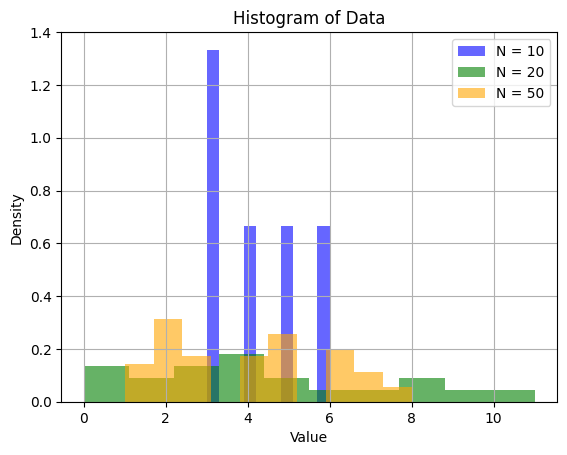

In [ ]:
# Assuming data10, data20, and data50 are your data arrays
plt.hist(data10, bins=10, density=True, alpha=0.6, label='N = 10', color='blue')
plt.hist(data20, bins=10, density=True, alpha=0.6, label='N = 20', color='green')
plt.hist(data50, bins=10, density=True, alpha=0.6, label='N = 50', color='orange')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Data')
plt.legend()
plt.grid(True)
plt.show()

Έπειτα βρίσκουμε τις Log-Likelihood για κάθε $N$, και βρίσκουμε την εκτίμηση μέγιστης πιθανοφάνειας και (προσεγγιστικά) το σφάλμα τους. Οι Log-Likelihood που βρήκαμε είναι οι

In [ ]:
mu, x = sp.symbols('\mu x', positive=True)
f = mu**x * sp.exp(- mu)/sp.factorial(x)

def Loglikelihood(data):
    lnL = 0
    for i in range(0,len(data)):
        lnL += sp.ln(f.subs(x, data[i]))
    return lnL.simplify().expand().evalf()

lnL10 = Loglikelihood(data10)
lnL20 = Loglikelihood(data20)
lnL50 = Loglikelihood(data50)

In [ ]:
f

\mu**x*exp(-\mu)/factorial(x)

In [ ]:
print('For N = 10 :\n')
lnL10

For N = 10 :



-10.0*\mu + 42.0*log(\mu) - 36.2566314471924

In [ ]:
print('For N = 20 :\n')
lnL20

For N = 20 :



-20.0*\mu + 90.0*log(\mu) - 95.6665252802813

In [ ]:
print('For N = 50 :\n')
lnL50

For N = 50 :



-50.0*\mu + 200.0*log(\mu) - 181.895534202477

των οποίων τα ακρότατα και τα αντίστοιχα σφάλματα είναι αντίστοιχα

In [ ]:
def mu_bar(data):
    lnL = Loglikelihood(data)
    return sp.solve(lnL.diff(mu), mu)
mu_bar10 = mu_bar(data10)[0]
max10 = lnL10.subs(mu,mu_bar10)
mu_bar20 = mu_bar(data20)[0]
max20 = lnL20.subs(mu,mu_bar20)
mu_bar50 = mu_bar(data50)[0]
max50 = lnL50.subs(mu,mu_bar50)

In [ ]:
def error_approx(data,mu_bar):
    lnL = Loglikelihood(data)
    Hessian =  -lnL.diff(mu).diff(mu).subs(mu, mu_bar)
    return sp.sqrt(1/Hessian)

In [ ]:
mu_bar10, max10, error_approx(data10,mu_bar10)

(4.20000000000000, -17.9830813850408, 0.648074069840786)

In [ ]:
mu_bar20, max20, error_approx(data20,mu_bar20)

(4.50000000000000, -50.2995595704166, 0.474341649025257)

In [ ]:
mu_bar50, max50, error_approx(data50,mu_bar50)

(4.00000000000000, -104.636661978499, 0.282842712474619)

ενώ το σφάλμα της εκτίμησης, προσεγγιστικά είναι

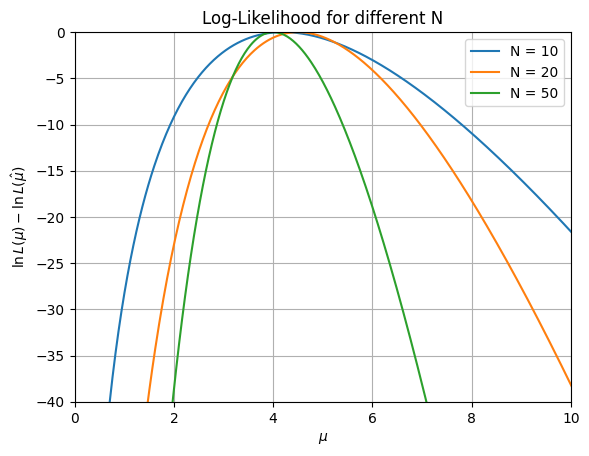

In [ ]:
# Convert SymPy expressions to NumPy functions
lnL_func10 = sp.lambdify(mu, lnL10, "numpy")
lnL_func20 = sp.lambdify(mu, lnL20, "numpy")
lnL_func50 = sp.lambdify(mu, lnL50, "numpy")

# Create an array of sigma values for plotting
mu_values = np.linspace(1e-3, 20, 1000)

# Evaluate the expressions for lnL and lnL_par at sigma values
lnL_values10 = lnL_func10(mu_values)
lnL_values20 = lnL_func20(mu_values)
lnL_values50 = lnL_func50(mu_values)

# Plot lnL and lnL_par
plt.plot(mu_values, lnL_values10 - lnL10.subs(mu,mu_bar10), label='N = 10')
plt.plot(mu_values, lnL_values20 - lnL20.subs(mu,mu_bar20), label='N = 20')
plt.plot(mu_values, lnL_values50 - lnL50.subs(mu,mu_bar50), label='N = 50')
plt.xlabel('$\mu$')
plt.ylabel('$\ln{L}(\mu) - \ln{L}(\hat{\mu})$')
plt.title('Log-Likelihood for different N')
plt.xlim(0,10)
plt.ylim(-40,0)
plt.legend()
plt.grid(True)
plt.show()

Επαναλαμβάνουμε τώρα την διαδικασία ξανά για 1000 φορές. Έτσι αρχικά παίρνουμε τα ιστογράμματα των $\hat{\mu}$ για κάθε ψευδοπείραμα.

In [ ]:
iters = 1000
N_values = [10, 20, 50]
data_10 = np.array([np.random.poisson(4, N_values[0]) for i in range(0,iters)])
data_20 = np.array([np.random.poisson(4, N_values[1]) for i in range(0,iters)])
data_50 = np.array([np.random.poisson(4, N_values[2]) for i in range(0,iters)])

In [ ]:
# Calculate log-likelihoods
lnLl_10 = np.array([Loglikelihood(data_10[i]) for i in range(0,iters)])
lnLl_20 = np.array([Loglikelihood(data_20[i]) for i in range(0,iters)])
lnLl_50 = np.array([Loglikelihood(data_50[i]) for i in range(0,iters)])

In [ ]:
mu_bars_10 = np.array([sp.solve(lnLl_10[i].diff(mu), mu)[0] for i in range(0,iters)], dtype=float)
mu_bars_20 = np.array([sp.solve(lnLl_20[i].diff(mu), mu)[0] for i in range(0,iters)], dtype=float)
mu_bars_50 = np.array([sp.solve(lnLl_50[i].diff(mu), mu)[0] for i in range(0,iters)], dtype=float)

In [ ]:
sigma_approx_10 = np.array([sp.sqrt(1 / -lnLl_10[i].diff(mu).diff(mu).subs(mu, mu_bars_10[i])) for i in range(0,iters) ], dtype=float)
sigma_approx_20 = np.array([sp.sqrt(1 / -lnLl_20[i].diff(mu).diff(mu).subs(mu, mu_bars_20[i])) for i in range(0,iters) ], dtype=float)
sigma_approx_50 = np.array([sp.sqrt(1 / -lnLl_50[i].diff(mu).diff(mu).subs(mu, mu_bars_50[i])) for i in range(0,iters) ], dtype=float)

In [ ]:
z_10 = np.array([(mu_bars_10[i] - np.mean(mu_bars_10))/sigma_approx_10[i] for i in range(0, iters)], dtype=float)
z_20 = np.array([(mu_bars_20[i] - np.mean(mu_bars_20))/sigma_approx_20[i] for i in range(0, iters)], dtype=float)
z_50 = np.array([(mu_bars_50[i] - np.mean(mu_bars_50))/sigma_approx_50[i] for i in range(0, iters)], dtype=float)

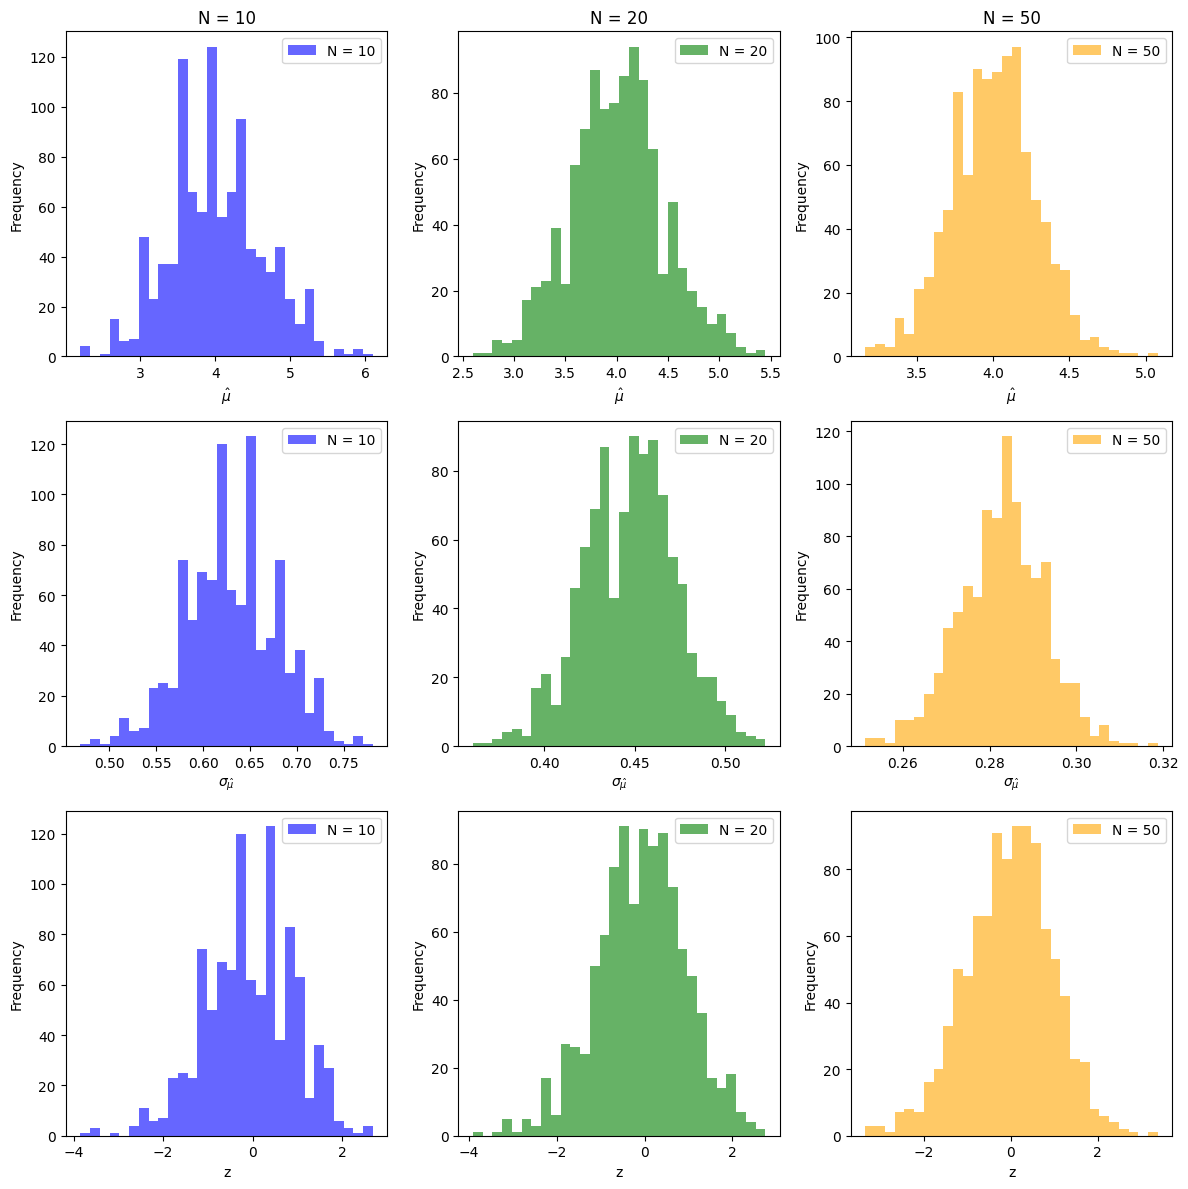

In [ ]:
# Define the number of bins for histograms
bins = 30

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Plot histograms for mu_bars
axs[0, 0].hist(mu_bars_10, bins=bins, density=False, alpha=0.6, color='blue', label='N = 10')
axs[0, 0].set_xlabel("$\hat{\mu}$")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("N = 10")
axs[0, 0].legend()

axs[0, 1].hist(mu_bars_20, bins=bins, density=False, alpha=0.6, color='green', label='N = 20')
axs[0, 1].set_xlabel("$\hat{\mu}$")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("N = 20")
axs[0, 1].legend()

axs[0, 2].hist(mu_bars_50, bins=bins, density=False, alpha=0.6, color='orange', label='N = 50')
axs[0, 2].set_xlabel("$\hat{\mu}$")
axs[0, 2].set_ylabel("Frequency")
axs[0, 2].set_title("N = 50")
axs[0, 2].legend()

# Plot histograms for sigma_approx
axs[1, 0].hist(sigma_approx_10, bins=bins, density=False, alpha=0.6, color='blue', label='N = 10')
axs[1, 0].set_xlabel("$\sigma_{\hat{\mu}}$")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].legend()

axs[1, 1].hist(sigma_approx_20, bins=bins, density=False, alpha=0.6, color='green', label='N = 20')
axs[1, 1].set_xlabel("$\sigma_{\hat{\mu}}$")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].legend()

axs[1, 2].hist(sigma_approx_50, bins=bins, density=False, alpha=0.6, color='orange', label='N = 50')
axs[1, 2].set_xlabel("$\sigma_{\hat{\mu}}$")
axs[1, 2].set_ylabel("Frequency")
axs[1, 2].legend()

# Plot histograms for z
axs[2, 0].hist(z_10, bins=bins, density=False, alpha=0.6, color='blue', label='N = 10')
axs[2, 0].set_xlabel("z")
axs[2, 0].set_ylabel("Frequency")
axs[2, 0].legend()

axs[2, 1].hist(z_20, bins=bins, density=False, alpha=0.6, color='green', label='N = 20')
axs[2, 1].set_xlabel("z")
axs[2, 1].set_ylabel("Frequency")
axs[2, 1].legend()

axs[2, 2].hist(z_50, bins=bins, density=False, alpha=0.6, color='orange', label='N = 50')
axs[2, 2].set_xlabel("z")
axs[2, 2].set_ylabel("Frequency")
axs[2, 2].legend()

# Adjust layout
plt.tight_layout()

# Set a higher resolution
dpi = 300
plt.savefig("histograms.png", dpi=dpi)

# Show the plots
plt.show()

Υπολογίσαμε και τη μεταβλητή $z = \frac{\hat{\mu} - \mu}{\sigma_{\hat{\mu}}}$ και πλοτάραμε τρία ιστογράμματα δείχοντας την κατανομή της. Από τα ιστογράμματα καταλαβαίνουμε ότι η $z$ προσεγγίζει την κανονική κατανομή, δηλαδή
$$
    z \propto N(0,1)
$$
πράγμα που δείχνει ότι ο εκτιμητής είναι αμερόληπτος και συνεπής.

Η μέση τιμή και η διασπορά για κάθε $N$ της εκτίμησης μέγιστης πιθανοφάνειας παραθέτονται στον πίνακα

In [ ]:
def variance(data):
    # Calculate the mean of the data
    mean = np.mean(data)
    return sum((x - mean)**2 for x in data) / (len(data) - 1)

print('For N = 10: mu =', np.mean(mu_bar10))
print('and Var[mu] =',variance(data10))
print('For N = 20: mu =', np.mean(mu_bar20))
print('and Var[mu] =',variance(data20))
print('For N = 50: mu =', np.mean(mu_bar50))
print('and Var[mu] =',variance(data50))

For N = 10: mu = 4.20000000000000
and Var[mu] = 1.511111111111111
For N = 20: mu = 4.50000000000000
and Var[mu] = 8.473684210526315
For N = 50: mu = 4.00000000000000
and Var[mu] = 4.081632653061225


## Άσκηση 3

Τα πειράματα ATLAS και CMS στο CERN έχουν πραγματοποιήσει μετρήσεις της ενεργού διατομής παραγωγής ζευγών top-anti-top quark σε συγκρούσεις πρωτονίων με ενέργεια κέντρου μάζας 13 TeV σε διαφορετικές τελικές καταστάσεις. Οι μετρήσεις δίνονται στον παρακάτω πίνακα:
| Μέτρηση | $\sigma (pb)$ | $stat. unc. (pb)$ | $syst. unc. (pb)$ | $lumi. unc. (pb)$ |
| :-: | :-: | :-: |  :-: | :-: |
| ATLAS dilepton | 818 | 8 | 27 | 19| 
| CMS dilepton | 815 | 9 | 38 | 19| 
| CMS l+jets | 888 | 2 | 27 | 20| 
| CMS hadronic | 834 | 25 | 118 | 23| 

1. Να κατασκευάσετε τον συνολικό πίνακα συνδιασποράς των μετρήσεων αυτών αν υποθέσουμε ότι: 1) οι στατιστικές αβεβαιότητες (δεύτερη στήλη) είναι ασυσχέτιστες, 2) οι συστηματικές αβεβαιότητες (τρίτη στήλη) μεταξύ των μετρήσεων του CMS έχουν 40\% συσχέτιση και μεταξύ των μετρήσεων του CMS και του ATLAS 20\%, 3) οι αβεβαιότητες στην φωτεινότητα (τέταρτη στήλη) είναι 100\% συσχετισμένες μεταξύ των μετρήσεων του CMS και 90\% μεταξύ των μετρήσεων του CMS και του ATLAS.
2. Να συνδυάσετε τις παραπάνω μετρήσεις σε ένα αποτέλεσμα με τη μέθοδο BLUE και χρησιμοποιώντας τον πίνακα συνδιασποράς του (1) ερωτήματος.

### Λύση

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Έχουμε διάφορες πηγές σφάλματος (με συσχέτιση ή μη των μετρήσεων), ανεξάρτητες μεταξύ τους, επομένως ο συνολικός πίνακας διασποράς είναι το άθροισμα των επιμέρους πινάκων,
$$
V_{tot} = V_{stat} + V_{syst} + V_{lum}.
$$
Έτσι θα κατασκευάσουμε τον πίνακα διασποράς για κάθε πηγή σφάλματος και στο τέλος θα τους αθροίσουμε. Πρώτα για τις στατιστικές αβεβαιότητες έχουμε

In [ ]:
# Define symbols
sigma_1, sigma_2, sigma_3, sigma_4 = sp.symbols('sigma_1 sigma_2 sigma_3 sigma_4')
rho_12, rho_13, rho_14, rho_23, rho_24, rho_34 = sp.symbols(r'\rho_{12} \rho_{13} \rho_{14} \rho_{23} \rho_{24} \rho_{34}')

In [ ]:
# Define the matrix V_stat
V_gen = sp.Matrix([
    [sigma_1**2, rho_12 * sigma_1 * sigma_2, rho_13 * sigma_1 * sigma_3, rho_14 * sigma_1 * sigma_4],
    [rho_12 * sigma_2 * sigma_1, sigma_2**2, rho_23 * sigma_2 * sigma_3, rho_24 * sigma_2 * sigma_4],
    [rho_13 * sigma_3 * sigma_1, rho_23 * sigma_3 * sigma_2, sigma_3**2, rho_34 * sigma_3 * sigma_4],
    [rho_14 * sigma_4 * sigma_1, rho_24 * sigma_4 * sigma_2, rho_34 * sigma_4 * sigma_3, sigma_4**2]
])

V_gen

Matrix([
[               sigma_1**2, \rho_{12}*sigma_1*sigma_2, \rho_{13}*sigma_1*sigma_3, \rho_{14}*sigma_1*sigma_4],
[\rho_{12}*sigma_1*sigma_2,                sigma_2**2, \rho_{23}*sigma_2*sigma_3, \rho_{24}*sigma_2*sigma_4],
[\rho_{13}*sigma_1*sigma_3, \rho_{23}*sigma_2*sigma_3,                sigma_3**2, \rho_{34}*sigma_3*sigma_4],
[\rho_{14}*sigma_1*sigma_4, \rho_{24}*sigma_2*sigma_4, \rho_{34}*sigma_3*sigma_4,                sigma_4**2]])

όπου οι στατιστικές αβεβαιότητες είναι ασυσχέτιστες, άρα όλα τα $\rho = 0$,

In [ ]:
# Create a substitution dictionary
substitutions_stat = {rho_14: 0, rho_12: 0, rho_13: 0, rho_23: 0, rho_24: 0, rho_34: 0, sigma_1: 8, sigma_2: 9, sigma_3: 2, sigma_4: 25}
V_stat = V_gen.subs(substitutions_stat)
V_stat

Matrix([
[64,  0, 0,   0],
[ 0, 81, 0,   0],
[ 0,  0, 4,   0],
[ 0,  0, 0, 625]])

Ομοίως και για τις άλλες δύο περιπτώσεις, λαμβάνοντας υπ'όψιν τις συσχετίσεις που δίνονται στην εκφώνηση, έχουμε

In [ ]:
# Create a substitution dictionary
substitutions_syst = {rho_12: 0.2, rho_13: 0.2, rho_14: 0.2, rho_23: 0.4, rho_24: 0.4, rho_34: 0.4, sigma_1: 27, sigma_2: 38, sigma_3: 27, sigma_4: 118}
V_syst = V_gen.subs(substitutions_syst)
V_syst

Matrix([
[  729,  205.2,  145.8,  637.2],
[205.2,   1444,  410.4, 1793.6],
[145.8,  410.4,    729, 1274.4],
[637.2, 1793.6, 1274.4,  13924]])

και

In [ ]:
# Create a substitution dictionary
substitutions_lum = {rho_12: 0.9, rho_13: 0.9, rho_14: 0.9, rho_23: 1, rho_24: 1, rho_34: 1, sigma_1: 19, sigma_2: 19, sigma_3: 20, sigma_4: 23}
V_lum = V_gen.subs(substitutions_lum)
V_lum 

Matrix([
[  361, 324.9, 342.0, 393.3],
[324.9,   361,   380,   437],
[342.0,   380,   400,   460],
[393.3,   437,   460,   529]])

Δηλαδή ο συνολικός πίνακας συνδιασποράς είναι

In [ ]:
V_tot = V_stat + V_syst + V_lum
V_tot

Matrix([
[  1154,  530.1,  487.8, 1030.5],
[ 530.1,   1886,  790.4, 2230.6],
[ 487.8,  790.4,   1133, 1734.4],
[1030.5, 2230.6, 1734.4,  15078]])

Έχοντας τον πίνακα συνδιασποράς, μπορούμε τώρα να εφαρμόσουμε τη (γενικευμένη) μέθοδο BLUE (για $N = 4$). Έτσι αρχικά υπολογίζουμε τον πίνακα $\vec{w}$, ως εξής,

In [ ]:
V_inv = V_tot.inv()
V_inv

Matrix([
[  0.00109249037755387, -0.000145422172305701, -0.000348997770481284, -1.30077532432306e-5],
[-0.000145422172305701,  0.000818878676100991, -0.000410749732010547, -6.39560214319373e-5],
[-0.000348997770481284, -0.000410749732010547,    0.0014441834385386, -8.15049211498644e-5],
[ -1.30077532432307e-5,  -6.39560214319374e-5,  -8.15049211498644e-5,  8.60476804858439e-5]])

όπου 

In [ ]:
# Create a column vector
u = sp.Matrix([
    [1],
    [1],
    [1],
    [1]
])
u

Matrix([
[1],
[1],
[1],
[1]])

έτσι

In [ ]:
denominator = u.T*V_inv*u
w = V_inv*u/ (denominator[0])
w

Matrix([
[  0.445143613459926],
[  0.151219057348715],
[   0.45873869435546],
[-0.0551013651641008]])

Επομένως τώρα μπορούμε να συνδυάσουμε τις μετρήσεις, χρησιμοποιώντας τους τύπους,
$$
    \begin{split}
        \hat{\theta} &= \sum_{i=1}^{N} w_{i} \theta_{i} 
        \\
        \sigma^2_{\hat{\theta}} &= \vec{w}^T V \vec{w} 
    \end{split}
$$
έτσι έχουμε

In [ ]:
CS = [818, 815, 888, 834]
theta_hat = sum(CS[i]*w[i] for i in range(len(CS)))
theta_hat

848.776429590210

In [ ]:
x = w.T@V_tot@w
sigma_theta = sp.sqrt(x[0])
sigma_theta

27.5834684283593

## Άσκηση 4

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Έστω ένα φυσικό μέγεθος το οποίο μειώνεται εκθετικά με τον χρόνο 
$$ 
y = y_0 e^{-t/ \tau}
$$
και διαθέτουμε το παρακάτω σύνολο μετρήσεων, όπου μπορούμε να αγνοήσουμε το σφάλμα στη μέτρηση του χρόνου.
| Α/Α | $t(min)$  | $y$ | $\sigma_y$ |
| :-: | :-: | :-: |  :-: | 
| 1 | 1 | 69.4 | 13.9 | 
| 2 | 2 | 40.8 | 8.2 |
| 3 | 3 | 44.4 | 8.9 |  
| 4 | 4 | 27.7 | 5.5 |  
| 5 | 5 | 17.1 | 3.4 | 
| 6 | 6 | 12.3 | 2.5 |  
| 7 | 7 | 7.8 | 1.6 |  
| 8 | 8 | 5.9 | 1.2 |  
| 9 | 9 | 7.2 | 1.4 |  
| 10 | 10 | 3.9 | 0.8 | 
1. Να υπολογίσετε τις σταθερές $y_0$ και $\tau$ καθώς και τον πίνακα διασποράς αυτών με τη βοήθεια του εκτιμητή $\chi^2$. (Πραγματοποιήστε κατάλληλο μετασχηματισμό ώστε να μπορέσετε να χρησιμοποιήσετε τους τύπους της γραμμικής παλινδρόμησης.)
2. Να υπολογίσετε την τιμή και την αβεβαιότητα της ποσότητας $y$ για $t = 15 min$. 
3. Να παραστήσετε στο ίδιο διάγραμμα τo σύνολο των μετρήσεων, την πρόβλεψη (προσαρμογή) του ερωτήματος (1), καθώς και την $\pm 1 \sigma$ ζώνη αβεβαιότητας αυτής (για την απεικόνιση της ζώνης αυτής να θεωρήσετε έναν ικανό αριθμό σημείων στα οποία να υπολογίσετε την πρόβλεψη και το σφάλμα της και τα οποία όταν αποτυπωθούν σε ένα γράφημα θα δώσουν την εν λόγω ζώνη).  

### Λύση

Αρχικά λογαριθμίζουμε τη σχέση που δίνεται 
$$
  y = y_0 e^{-t/ \tau}
$$
όπου έχουμε
$$
    \ln{y} = \ln{y_0} -t/ \tau
$$
και έτσι γραμμικοποιούμε τη σχέση, ώστε να εφαρμόσουμε τον εκτιμητή $\chi^2$. Έτσι εφαρμόζουμε τη γραμμική παλινδρόμηση στο γραμμικό μοντέλο με 2 παραμέτρους ($y = \alpha + b x$), και υπολογίζουμε τους συντελεστές σύμφωνα με τους τύπους,
$$
\begin{split}
        \hat{b} &= \frac{\left(\sum_{i=1}^{N} w_i x_i y_i \right) \left( \sum_{i = 1}^{N}w_i \right) - \left( \sum_{i = 1}^{N}w_i x_i \right) \left( \sum_{i = 1}^{N}w_i y_i \right)}{\left( \sum_{i = 1}^{N}w_i x_i^2 \right)\left( \sum_{i = 1}^{N}w_i \right) - \left( \sum_{i = 1}^{N}w_i x_i \right)^2} 
        \\
        \hat{\alpha} &= \frac{\left(\sum_{i=1}^{N} w_i y_i \right) \left( \sum_{i = 1}^{N}w_i x_i^2 \right) - \left( \sum_{i = 1}^{N}w_i x_i y_i \right) \left( \sum_{i = 1}^{N}w_i x_i \right)}{\left( \sum_{i = 1}^{N}w_i x_i^2 \right)\left( \sum_{i = 1}^{N}w_i \right) - \left( \sum_{i = 1}^{N}w_i x_i \right)^2}
    \end{split}
$$
οι οποίοι έχουν αβεβαιότητες
$$
\begin{split}
        \sigma_{\alpha} &= \sqrt{\frac{\sum_{i = 1}^{N}w_i x_i^2}{\left( \sum_{i = 1}^{N}w_i x_i^2 \right)\left( \sum_{i = 1}^{N}w_i \right) - \left( \sum_{i = 1}^{N}w_i x_i \right)^2}}
        \\
        \sigma_{b} &= \sqrt{\frac{\sum_{i = 1}^{N}w_i}{\left( \sum_{i = 1}^{N}w_i x_i^2 \right)\left( \sum_{i = 1}^{N}w_i \right) - \left( \sum_{i = 1}^{N}w_i x_i \right)^2}}
    \end{split}
$$
με συντελεστή συσχέτισης 
$$
    \rho_{\alpha b} = -\frac{\sum_{i = 1}^{N}w_i x_i}{\sqrt{\sum_{i = 1}^{N}w_i} \sqrt{\sum_{i = 1}^{N}w_i x_i^2}}
$$
και τέλος μπορούμε να υπολογίσουμε τον πίνακα συνδιασποράς
$$
    V = \frac{1}{\left( \sum_{i = 1}^{N}w_i x_i^2 \right)\left( \sum_{i = 1}^{N}w_i \right) - \left( \sum_{i = 1}^{N}w_i x_i \right)^2}
    \begin{bmatrix}
\sum_{i = 1}^{N}w_i x_i^2 & -\sum_{i = 1}^{N}w_i x_i 
\\
-\sum_{i = 1}^{N}w_i x_i & \sum_{i = 1}^{N}w_i
\end{bmatrix}
$$
Ακολουθώντας τα παραπάνω, προκύπτει ότι το γραμμικό μοντέλο είναι το 

In [ ]:
Ys = [69.6, 40.8, 44.4, 27.7, 17.1, 12.3, 7.8, 5.9, 7.2, 3.9] #Y data
sigma_Y = [13.9, 8.2, 8.9, 5.5, 3.4, 2.5, 1.6, 1.2, 1.4, 0.8] # Y errors
ts = np.array([d+1 for d in range(0,len(Ys))])  #Time
w = np.array([1/(1/(Ys[i])**2 * sigma_Y[i]**2) for i in range(0,len(Ys))]) #Weights

In [ ]:
sigma_Y/ np.array(Ys)

array([0.19971264, 0.20098039, 0.20045045, 0.19855596, 0.19883041,
       0.20325203, 0.20512821, 0.20338983, 0.19444444, 0.20512821])

In [ ]:
beta = (sum(w * np.log(Ys) * ts)*sum(w) - sum(w*ts) * sum(w*np.log(Ys)))/(sum(w*ts**2)*sum(w) - sum(w*ts)**2)
beta

-0.3158840046438527

In [ ]:
alpha = ( sum(w*np.log(Ys)) * sum(w*ts**2) - sum(w*ts*np.log(Ys))*sum(w*ts) )/(sum(w*ts**2)*sum(w) - sum(w*ts)**2)
alpha

4.4991943656600535

Ακολουθώντας τα παραπάνω, προκύπτει ότι το γραμμικό μοντέλο είναι το 

In [ ]:
t = np.linspace(0,max(ts),100)
y_chi2 = alpha +beta*t

δηλαδή οι σταθερές (μετασχηματίζοντας ξανά το λογάριθμο) είναι ίσες με

In [ ]:
y0 = np.exp(alpha)
tau = -1/beta
y0, tau

(89.94463961317986, 3.1657190148879564)

και ο πίνακας διασποράς είναι

In [ ]:
const = 1/(sum(w*ts**2)*sum(w) - sum(w*ts)**2)
matrix_data =  [
    [const* sum(w*ts**2), -const*sum(w*ts)],
    [-const*sum(w*ts), const*sum(w)]
]
V = sp.Matrix(matrix_data)
V

Matrix([
[  0.0187221927272686, -0.00267932913292852],
[-0.00267932913292852, 0.000488831312303702]])

ενώ παριστάνοντας γραφικά τη συνάρτηση και τα σημεία σε λογαριθμική κλίμακα έχουμε

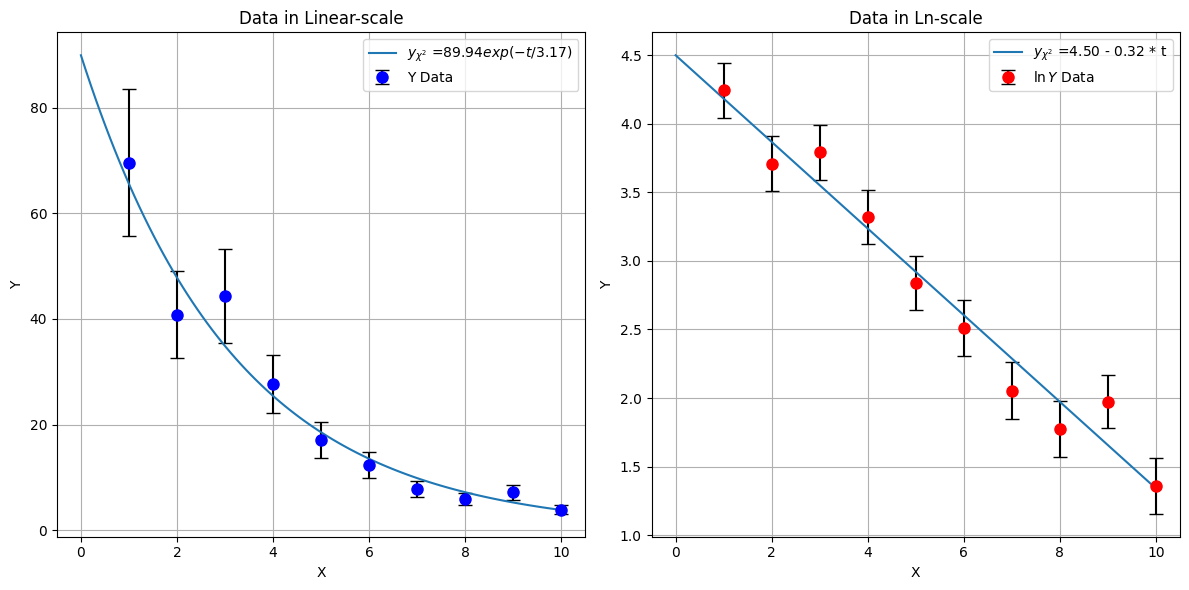

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot in linear scale with error bars
axes[0].errorbar(ts, Ys, yerr=sigma_Y, fmt="o", color="blue", markersize=8, capsize=5, capthick=1, ecolor="black", label="Y Data")
axes[0].plot(t, np.exp(y_chi2), label='$y_{\chi^2}$ =' + f'$ {np.exp(alpha):.2f} exp(-t/{tau:.2f})$' )
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Data in Linear-scale")
axes[0].grid(True)
axes[0].legend()

# Plot in log scale
axes[1].errorbar(ts, np.log(Ys), yerr=sigma_Y/ np.array(Ys), fmt="o", color="red", markersize=8, capsize=5, capthick=1, ecolor="black", label="$\ln{Y}$ Data")
axes[1].plot(t, y_chi2, label='$y_{\chi^2}$ =' + f'{alpha:.2f} - {abs(beta):.2f} * t')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_title("Data in Ln-scale")
axes[1].grid(True)
axes[1].legend()
#axes[1].plot(t, y_chi2, label=f'Fitted Line: y_chi2 = {alpha:.2f} + {beta:.2f} * t')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

όπου τώρα μπορούμε να προβλέψουμε τη τιμή της ποσότητας y για $t = 15$ και το σφάλμα της.  ́Εχοντας υπολογίσει τα σφαλμάτα των σταθερών α και b

In [ ]:
sigma_a = np.sqrt( sum(w)/ ( sum(w*ts**2)* sum(w) - sum(w*ts)**2  )   )
sigma_a

0.02210952989784501

In [ ]:
sigma_b = np.sqrt( sum(w*ts**2)/ ( sum(w*ts**2)* sum(w) - sum(w*ts)**2  )   )
sigma_b

0.13682906389823998

και το συντελεστή συσχέτισης

In [ ]:
rho_ab = - sum(w*ts)/(np.sqrt(sum(w)) * np.sqrt(sum(w*ts**2)))
rho_ab

-0.8856623887583402

In [ ]:
t_n = 15
sigma_y_n = np.sqrt((1*sigma_b)**2 + (t_n * sigma_a)**2 + 2 * rho_ab * t_n * sigma_a * sigma_b)

Τέλος παράγουμε το διάγραμμα με το σύνολο των μετρήσεων, τη προσαρμογή και την ζώνη $1- \sigma$

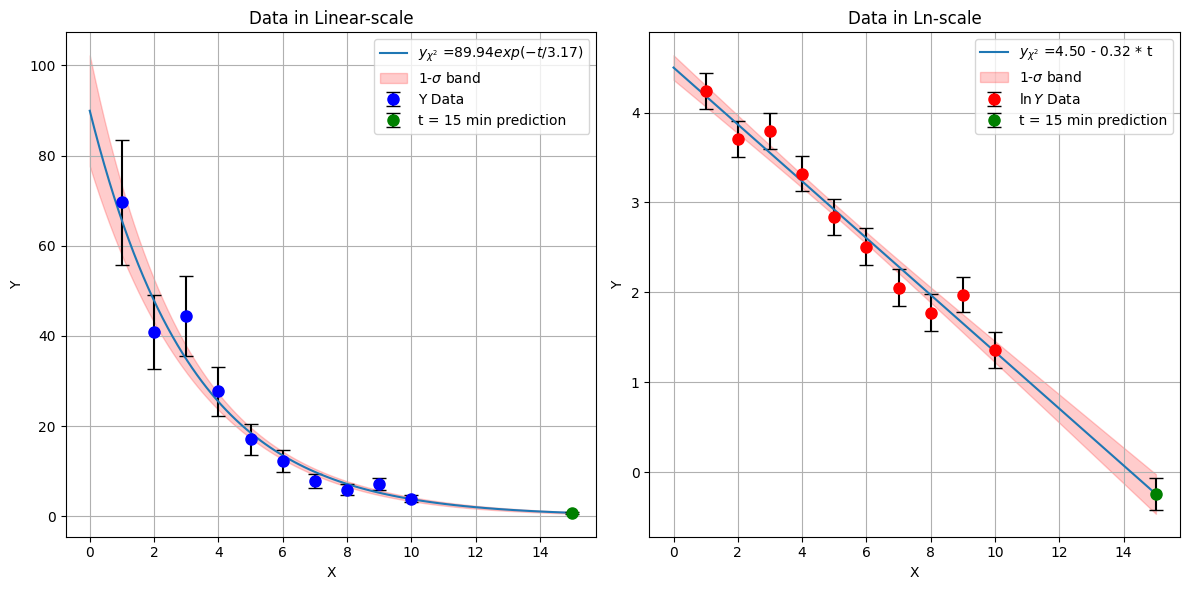

In [ ]:
t = np.linspace(0,15,100)
y_chi2 = alpha +beta*t
sigma_y_t = np.sqrt((1*sigma_b)**2 + (t * sigma_a)**2 + 2 * rho_ab * t * sigma_a * sigma_b)
# Calculate upper and lower bounds for 1-sigma band - linear scale
upper_bound_lin = np.exp(y_chi2) + sigma_y_t*np.exp(y_chi2)
lower_bound_lin = np.exp(y_chi2) - sigma_y_t*np.exp(y_chi2)

# Calculate upper and lower bounds for 1-sigma band - ln scale
upper_bound_ln = y_chi2 + sigma_y_t
lower_bound_ln = y_chi2 - sigma_y_t


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot in linear scale with error bars
axes[0].errorbar(ts, Ys, yerr=sigma_Y, fmt="o", color="blue", markersize=8, capsize=5, capthick=1, ecolor="black", label="Y Data")
axes[0].plot(t, np.exp(y_chi2), label='$y_{\chi^2}$ =' + f'$ {np.exp(alpha):.2f} exp(-t/{tau:.2f})$' )
axes[0].errorbar(15,np.exp( alpha +beta*15),yerr = sigma_y_n, fmt="o", color="green", markersize=8, capsize=5, capthick=1, ecolor="black",label = 't = 15 min prediction')
axes[0].fill_between(t, lower_bound_lin,upper_bound_lin, color="red", alpha=0.2, label="1-$\sigma$ band")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Data in Linear-scale")
axes[0].grid(True)
axes[0].legend()

# Plot in log scale
axes[1].errorbar(ts, np.log(Ys), yerr=sigma_Y/ np.array(Ys), fmt="o", color="red", markersize=8, capsize=5, capthick=1, ecolor="black", label="$\ln{Y}$ Data")
axes[1].plot(t, y_chi2, label='$y_{\chi^2}$ =' + f'{alpha:.2f} - {abs(beta):.2f} * t')
axes[1].fill_between(t,lower_bound_ln,upper_bound_ln, color="red", alpha=0.2, label="1-$\sigma$ band")
axes[1].errorbar(15,alpha +beta*15,yerr = sigma_y_n*np.exp(alpha +beta*15), fmt="o", color="green", markersize=8, capsize=5, capthick=1, ecolor="black",label = 't = 15 min prediction')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_title("Data in Ln-scale")
axes[1].grid(True)
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Άσκηση 5

Έστω μία ποσότητα $y$ η οποία εξαρτάται γραμμικά από την ποσότητα $x:$
$$
    y = \alpha + b\cdot x
$$
Υποθέτουμε ότι η αβεβαιότητα στη μέτρηση του $y$ είναι $\sigma = 0.5$ (ανεξάρτητη του $y$).
1. Να παράξετε και να παραστήσετε γραφικά (με το σφάλμα στο $y$) ένα σύνολο $N = 10$ τυχαίων ζευγών $(x, y)$, όπου το $x$ είναι ομοιόμορφα κατανεμημένο στο διάστημα $[0, 10]$ και το $y$ ακολουθεί κανονική κατανομή με μέση τιμή $\mu = - 0.5x + 5$ και διασπορά $\sigma$.
2. Για το παραπάνω σύνολο τιμών να κάνετε προσαρμογή του μοντέλου $ y = \alpha + b\cdot x$ με τη μέθοδο ελαχίστων τετραγώνων και να υπολογίσετε τις παραμέτρους του μοντέλου καθώς και τον πίνακα διασποράς τους.
3. Να επαναλάβετε το ερώτημα (2) χρησιμοποιώντας το μοντέλο 
    $$
        y = \alpha + b \cdot x + c \cdot x^2
    $$
    (στα ίδιο σύνολο τιμών). Ποιο μοντέλο δίνει καλύτερη προσαρμογή?
4. Να επαναλάβετε τα βήματα (1) και (2) 10000 φορές και να βρείτε τις κατανομές των παραμέτρων $\hat{\alpha}$, $\hat{b}$, των ποσοτήτων $\frac{\hat{\alpha} - \alpha_{true}}{\sigma_{\hat{\alpha}}}$, $\frac{\hat{b} - b_{true}}{\sigma_{\hat{b}}}$, $\chi^2_{min}$ καθώς και της \tl{p-value} $P(\chi^2 \geq \chi^2_{min} )$.
5. Να επαναλάβετε όλα τα παραπάνω για $\sigma = 0.1$ και για $Ν = 20$.
6. Σχολιάστε τα αποτελέσματα.

### Λύση

Αρχικά παράγουμε τα τυχαία σημεία-ζεύγη των $X$ και $Y$ και τα πλοτάρουμε,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm,chi2
from scipy.optimize import minimize

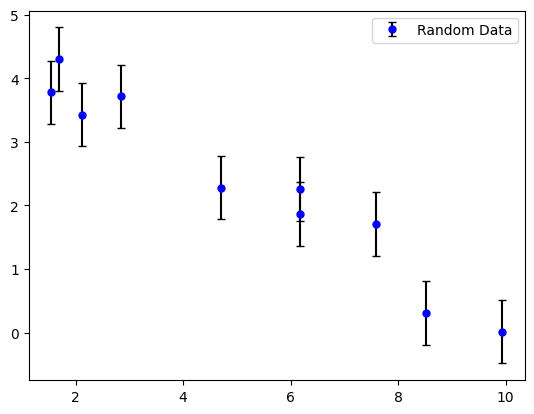

In [ ]:
x = np.random.uniform(0,10,10)
y = np.random.normal(-0.5*x + 5,0.5)
sigma= np.array([0.5 for i in range(0,len(y))])
w = 1/(sigma)**2
plt.errorbar(x,y,yerr = 0.5, fmt="o", color="blue", markersize=5, capsize=3, capthick=1, ecolor="black", label="Random Data")
plt.legend()
plt.show()

Κάνοντας τις πράξεις που ακολουθήσαμε και στην προηγούμενη άσκηση, προκύπτει η ευθεία ελαχίστων τετραγώνων

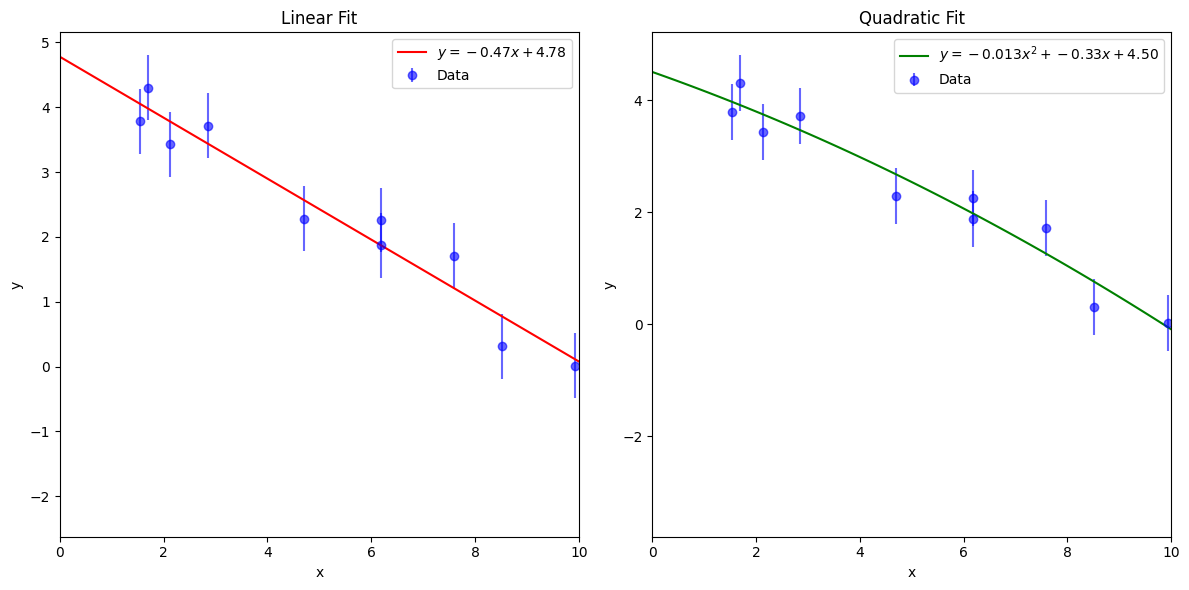

In [ ]:
# Linear model function
def linear_model(x, slope, intercept):
    return slope * x + intercept

# Quadratic model function
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

x1 = np.linspace(0,15,100)
# Fit linear model
linear_params, linear_covariance = curve_fit(linear_model, x, y, sigma=sigma)

# Fit quadratic model
quadratic_params, quadratic_covariance = curve_fit(quadratic_model, x, y, sigma=sigma)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for linear fit
axes[0].errorbar(x, y, yerr = 0.5, fmt="o", label='Data', color='blue', alpha=0.6)
axes[0].plot(x1, linear_model(x1, *linear_params), label=f'$y = {linear_params[0]:.2f}x + {linear_params[1]:.2f}$', color='red')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim(0,10)
axes[0].set_title('Linear Fit')
axes[0].legend()

# Plot for quadratic fit
axes[1].errorbar(x, y, yerr = 0.5, fmt="o", label='Data', color='blue', alpha=0.6)
axes[1].plot(x1, quadratic_model(x1, *quadratic_params), label=f'$y = {quadratic_params[0]:.3f}x^2 + {quadratic_params[1]:.2f}x + {quadratic_params[2]:.2f}$', color='green')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_xlim(0,10)
axes[1].set_title('Quadratic Fit')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Οι πίνακες συνδιασποράς των δύο fit είναι

In [ ]:
print("Linear Covariance Matrix:")
print(linear_covariance)
print("Quadratic Covariance Matrix:")
print(quadratic_covariance)

Linear Covariance Matrix:
[[ 0.00165507 -0.00849479]
 [-0.00849479  0.05714949]]
Quadratic Covariance Matrix:
[[ 0.00033894 -0.00364809  0.00702051]
 [-0.00364809  0.04102557 -0.08459881]
 [ 0.00702051 -0.08459881  0.20620511]]


In [ ]:
xs = np.array([np.random.uniform(0,10,10) for i in range(0,10000)])
ys = np.array([np.random.normal(-0.5*xs[i] + 5,0.5) for i in range(0,10000)])
alphas = np.array([curve_fit(linear_model, xs[d], ys[d], sigma=sigma)[0][0] for d in range(0,10000)])
betas = np.array([curve_fit(linear_model, xs[d], ys[d], sigma=sigma)[0][1] for d in range(0,10000)])
chi2_values =  np.array([sum(w*(ys - betas[d] - alphas[d]*xs)) for d in range(0,10000)])

KeyboardInterrupt: 

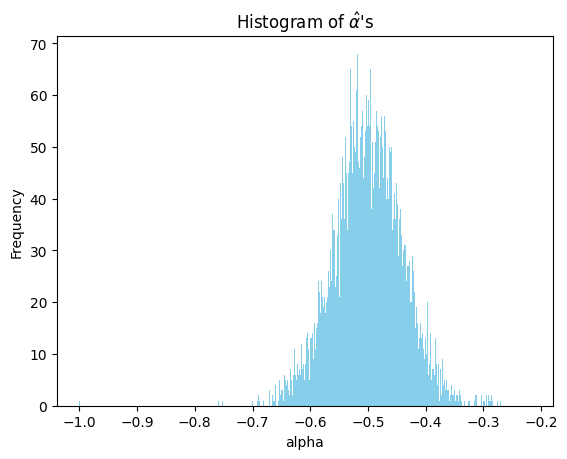

In [ ]:
plt.hist(alphas, bins = 1000,color = 'skyblue')
plt.title('Histogram of $\\hat{\\alpha}$\'s')
plt.xlabel('alpha')
plt.ylabel('Frequency')
plt.show()

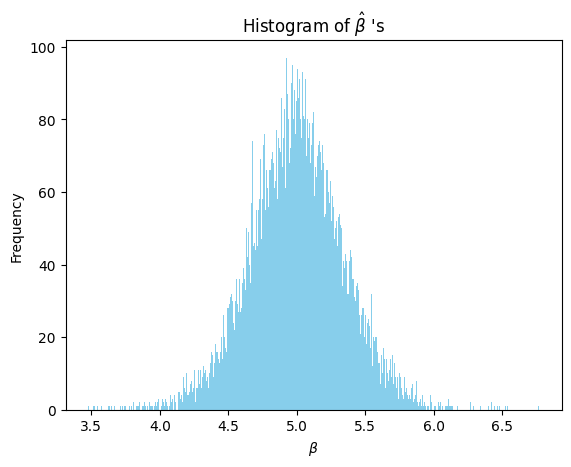

In [ ]:
plt.hist(betas, bins = 500,color = 'skyblue')
plt.title('Histogram of $\\hat{\\beta}$ \'s')
plt.xlabel('$\\beta$')
plt.ylabel('Frequency')
plt.show()

Οι παράμετροι $\hat{\alpha}$, $\hat{b}$ ακολουθούν την κανονική κατανομή με μέση τιμή $\mu \sim 5$ και $\mu \sim -0.5$ αντίστοιχα. Μετά υπολογίζουμε τις ποσότητες $\frac{\hat{\alpha} - \alpha_{true}}{\sigma_{\hat{\alpha}}}$ και $\frac{\hat{b} - b_{true}}{\sigma_{\hat{b}}}$, οι οποίες ακολουθούν την τυποποιημένη κανονική κατανομή, πράγμα που αποδεικνύει ότι οι εκτιμητές είναι αμερόληπτοι και συνεπείς.

In [ ]:
alpha_v = np.array([(alphas[i] - np.mean(alphas))/np.std(alphas) for i in range(0,10000)])
beta_v = np.array([(betas[i] - np.mean(betas))/np.std(betas) for i in range(0,10000)])

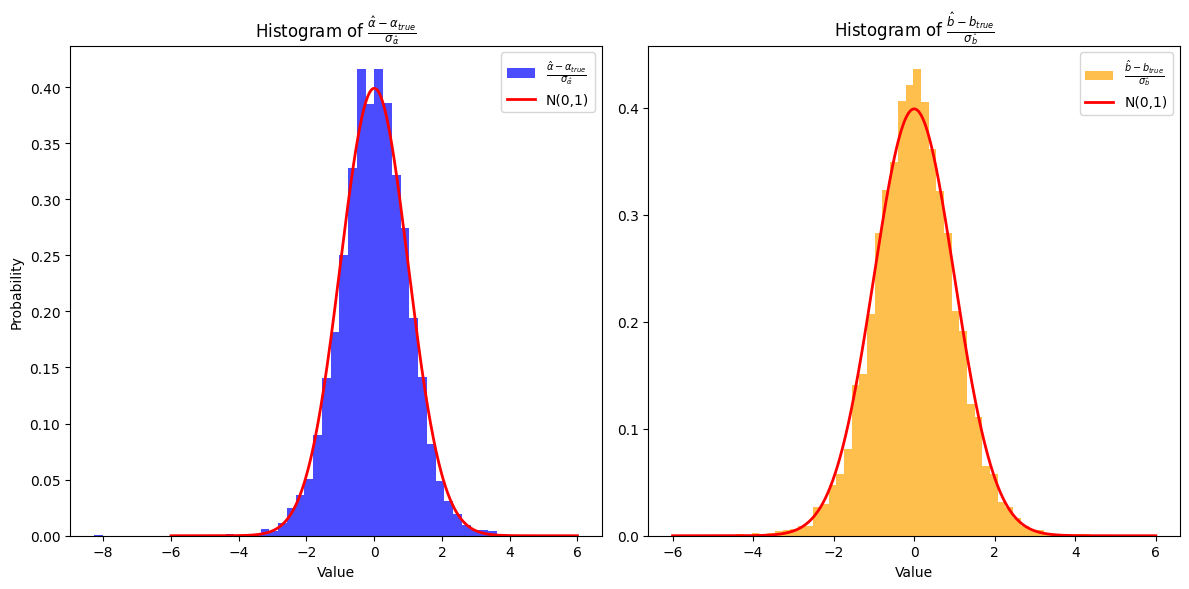

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms
bins = 50  # You can adjust the number of bins
axes[0].hist(alpha_v, bins=bins, density=True, alpha=0.7, color='blue',label = '$\\frac{\\hat{\\alpha} - \\alpha_{true}}{\\sigma_{\\hat{\\alpha}}}$')
axes[1].hist(beta_v, bins=bins, density=True, alpha=0.7, color='orange',label ='$\\frac{\\hat{b} - b_{true}}{\\sigma_{\\hat{b}}}$' )

# Plot the standard normal distribution curve
x = np.linspace(-6, 6, 1000)  # Adjust the range as needed
axes[0].plot(x, norm.pdf(x), 'r-', lw=2, label='N(0,1)')
axes[1].plot(x, norm.pdf(x), 'r-', lw=2, label='N(0,1)')

# Set titles and labels
axes[0].set_title('Histogram of $\\frac{\\hat{\\alpha} - \\alpha_{true}}{\\sigma_{\\hat{\\alpha}}}$')
axes[1].set_title('Histogram of $\\frac{\\hat{b} - b_{true}}{\\sigma_{\\hat{b}}}$')
axes[0].set_xlabel('Value')
axes[1].set_xlabel('Value')
axes[0].set_ylabel('Probability')
axes[0].legend()
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Έπειτα παράγουμε το ιστόγραμμα της ποσότητας $\chi^2_{min}$, η οποία έρχεται ακολουθεί την κατανομή $\chi^2$ για 8 βαθμούς ελευθερίας, που σημαίνει ότι τα σφάλματα των $y$ είναι Gaussian, όπως φαίνεται και στο σχήμα

In [ ]:
# Generate example data
num_iterations = 10000
num_data_points = 10
chismin = []

for _ in range(num_iterations):
    x = np.random.uniform(0, 10, num_data_points)
    y = np.random.normal(-0.5 * x + 5, 0.5)
    
    # Define the chi-squared function to minimize
    def chi2_function(params):
        a, b = params
        residuals = y - a - b * x
        return np.sum(w * residuals**2)
    
    # Calculate the minimum of the chi-squared function
    result = minimize(chi2_function, [0, 0])
    chismin.append(result.fun)


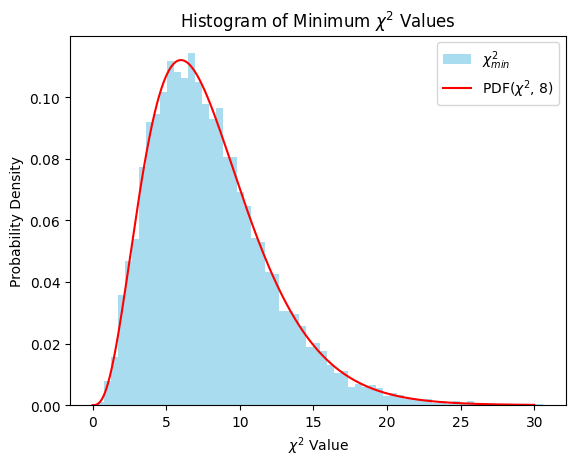

In [ ]:
# Create a chi-squared distribution with 8 degrees of freedom
chisq_dist = chi2(df=8)
x_vals = np.linspace(0, 30, 1000)
pdf_vals = chisq_dist.pdf(x_vals)

# Plot the histogram of minimum chi-squared values
plt.hist(chismin, bins='auto', density=True, alpha=0.7, color='skyblue', label=r'$\chi^2_{min}$')
plt.plot(x_vals, pdf_vals, color='red', label=r'PDF($\chi^2$, 8)')
plt.xlabel(r'$\chi^2$ Value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Histogram of Minimum $\chi^2$ Values')
plt.show()

In [ ]:
p_values = chi2.sf(chismin, 8)
p_values

array([0.06825787, 0.46236857, 0.23905604, ..., 0.85292954, 0.62372189,
       0.88029903])

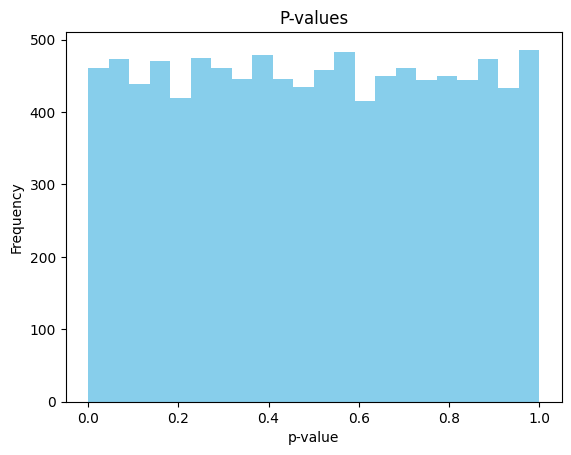

In [ ]:
plt.hist(p_values,bins = 'auto',color='skyblue')
plt.title('P-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

# Εργασία 3

## Άσκηση 1

Έστω μία τυχαία μεταβλητή Χ που ακολουθεί την κατανομή Rayleigh,
με πυκνότητα πιθανότητας
$$
    f(x|\sigma) = \frac{x}{\sigma^2}e^{-x^2/2\sigma^2}, \quad x\geq 0.
$$
Να κατασκευάσετε με τη μέθοδο Neyman την ζώνη εμπιστοσύνης (confidence belt) για την παράμετρο $\sigma \in [1,20]$ για κεντρικό διάστημα με επίπεδο εμπιστοσύνης $CL = 0.9$ και να την παραστήσετε γραφικά. Προτεινόμενη διαδικασία: επιλέξτε έναν ικανό αριθμό τιμών της παραμέτρου $\sigma$ στο  διάστημα $[1,20]$ και για κάθε τιμή βρείτε τα $x_1 (\sigma)$, $x_2 (\sigma)$ ώστε
$$
    \int^{x_1 (\sigma)}_{0} f(x|\sigma) dx = \frac{1 -CL}{2}
$$
και
$$
    \int_{x_2 (\sigma)}^{\infty} f(x|\sigma)dx = \frac{1 -CL}{2}
$$
(τα εν λόγω ολοκληρώματα υπολογίζονται αναλυτικά).

### Λύση

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import brentq

In [ ]:
CL = 0.9
N = 1000
sigmas = np.random.uniform(1, 20,N)
sigmas[:5]

array([13.50364265,  2.9831229 , 12.44034959, 15.30132481, 18.46042603])

In [ ]:
def integrand(x, sigma):
    return (np.exp(-x**2 / (2 * sigma**2)) * x) / sigma**2

def equation1(x1,sigma,CL):
    integral, _ = quad(integrand, 0, x1, args=(sigma,))
    return integral - (1 - CL) / 2

def equation2(x2, sigma, CL):
    integral, _ = quad(integrand, x2, np.inf, args=(sigma,))
    return integral - (1 - CL) / 2

def find_x1(sigma, CL):
    return brentq(equation1, 0, 10 * sigma, args=(sigma, CL))

def find_x2(sigma, CL):
    return brentq(equation2, 0, 10 * sigma, args=(sigma, CL))

In [ ]:
x1_sols = np.array([find_x1(sigma, CL) for sigma in sigmas])
x2_sols = np.array([find_x2(sigma, CL) for sigma in sigmas])

KeyboardInterrupt: 

In [ ]:
x1_sols[:5],x2_sols[:5]

(array([2.77347234, 6.23355309, 6.38571808, 2.68815204, 0.58118798]),
 array([21.19556713, 47.63836694, 48.8012497 , 20.54352811,  4.44158343]))

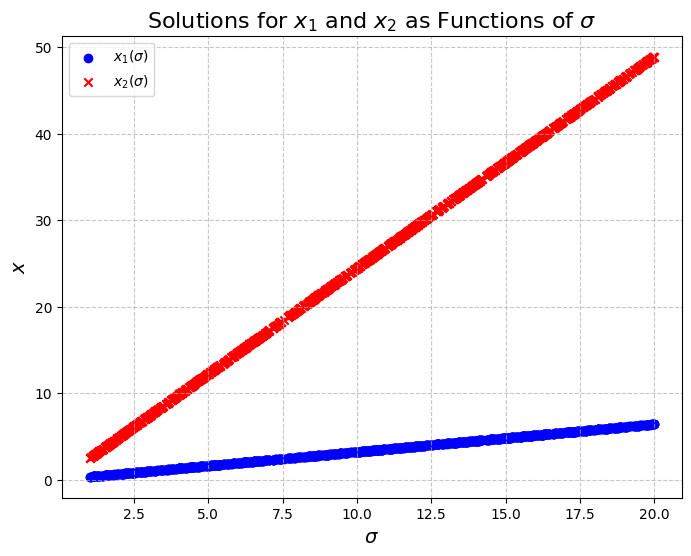

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Scatter plots for x1 and x2 solutions
plt.scatter(sigmas, x1_sols, label='$x_1 (\\sigma)$', color='blue', marker='o')
plt.scatter(sigmas, x2_sols, label='$x_2 (\\sigma)$', color='red', marker='x')

# Adding labels and a title
plt.xlabel('$\\sigma$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.title('Solutions for $x_1$ and $x_2$ as Functions of $\\sigma$', fontsize=16)

# Adding a legend
plt.legend()

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Άσκηση 2

Θεωρήστε την τυχαία μεταβλητή του προηγούμενου θέματος για $\sigma = 10$. Να παράξετε μία τυχαία τιμή αυτής της μεταβλητής, την οποία θεωρούμε ως μία μέτρηση $x_{obs}$, και στη συνέχεια να βρείτε το κεντρικό διάστημα εμπιστοσύνης με $CL =0.9$ για την παράμετρο $\sigma$, χρησιμοποιώντας τη μέτρηση $x_{obs}$ και τη ζώνη
εμπιστοσύνης που κατασκευάσατε στο προηγούμενο θέμα. Περιλαμβάνεται η τιμή $\sigma = 10$ σε αυτό; Να επαναλάβετε τη διαδικασία 1000 φορές και να αναφέρετε το ποσοστό των διαστημάτων που δεν περιλαμβάνουν την πραγματική τιμή της παραμέτρου. Σχολιάστε το αποτέλεσμα.

### Λύση

In [ ]:
sigma_obs = 10
x_obs = np.random.rayleigh(sigma_obs)
x_obs

14.406788544429984

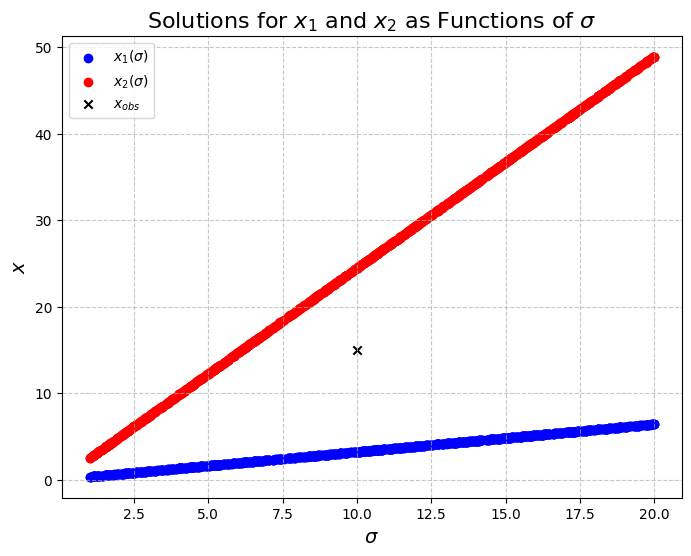

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Scatter plots for x1 and x2 solutions
plt.scatter(sigmas, x1_sols, label='$x_1 (\\sigma)$', color='blue', marker='o')
plt.scatter(sigmas, x2_sols, label='$x_2 (\\sigma)$', color='red', marker='o')
plt.scatter(sigma_obs,x_obs,color = 'black',label = '$x_{obs}$', marker='x')

# Adding labels and a title
plt.xlabel('$\\sigma$', fontsize=14)
plt.ylabel('$x$', fontsize=14)
plt.title('Solutions for $x_1$ and $x_2$ as Functions of $\\sigma$', fontsize=16)

# Adding a legend
plt.legend()

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
x_obs_data = np.random.rayleigh(sigma_obs,1000)
x_obs_data[:5]

array([ 9.50989651,  3.58687431,  6.62863827, 17.07277807,  7.91604878])

In [ ]:
closest_index = np.abs(np.array(sigmas) - 10).argmin()
closest_index, x1_sols[closest_index], x2_sols[closest_index]

(947, 3.1996190593607983, 24.452286611067546)

Επαναλαμβάνουμε τώρα τη παραπάνω διαδικασία 1000 φορές και ελέγχουμε τον αριθμό των σημείων που βρίσκονται εντός του διαστήματος. Έτσι για κάθε $x_{obs}$ που παράγεται ελέγχουμε αν είναι ανάμεσα στα $x_1$ και $x_2$ της πρώτης άσκησης και καταλήγουμε ότι το

In [ ]:
count_meets_condition = 0
for x_obs in x_obs_data:
    if x_obs > x1_sols[closest_index] and x_obs < x2_sols[closest_index]:
        count_meets_condition += 1
percentage = count_meets_condition/N *100
print(f'The {percentage:.2f}% of the x_obs is in the interval')

The 88.90% of the x_obs is in the interval


των $x_{obs}$ είναι ανάμεσα στο διάστημα. Αυτό έρχεται σε συμφωνία με το διάστημα εμπιστοσύνης μιας και έχει $CL = 0.9$.

## Άσκηση 3

Θεωρήστε μία τυχαία μεταβλητή που ακολουθεί κατανομή Poisson με $\mu = 8$. Να παράξετε ένα σύνολο από $N = 20$ τιμές της τυχαίας μεταβλητής και να βρείτε την εκτίμηση μέγιστης πιθανοφάνειας για την παράμετρο $\mu$ καθώς και το σφάλμα αυτής (με την προσεγγιστική μέθοδο). Στη συνέχεια να αναφέρετε το κεντρικό διάστημα εμπιστοσύνης με $CL = 0.6827$ για την παράμετρο $\mu$. Ποια είναι η απάντηση στο παραπάνω ερώτημα αν χρησιμοποιήσετε μόνο την πρώτη τιμή από το σύνολο των 20 τιμών που παράξατε;

### Λύση

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.stats as stats


Πρώτα παράγουμε τους τυχαίους αριθμούς, βρίσκουμε τη Log-Likelihood, την εκτίμηση μέγιστης πιθανοφάνειας και (προσεγγιστικά) το σφάλμα τους. Έτσι η Log-Likelihood που προκύπτει είναι

In [ ]:
CL = 0.6827
alpha = 1-CL
N = 20
mu,x = sp.symbols('\mu x', positive = True)

In [ ]:
f = sp.exp( - mu) * mu**x/(sp.factorial(x))

In [ ]:
data = np.random.poisson(8,N)
data[:5]
def Loglikelihood(data):
    lnL = 0
    for i in range(0,len(data)):
        lnL += sp.log(f.subs(x, data[i]))
    return lnL.expand(log=True,force=True).evalf()

lnL = Loglikelihood(data)
lnL

-20.0*\mu + 155.0*log(\mu) - 209.108756934213

In [ ]:
def mu_bar(data):
    return sp.solve(Loglikelihood(data).diff(mu), mu)
mu_bar = mu_bar(data)[0]
mu_bar

7.75000000000000

και η γραφική της παράσταση είναι

<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in log
  return -20.0*Dummy_58 + 155.0*log(Dummy_58) - 209.108756934213


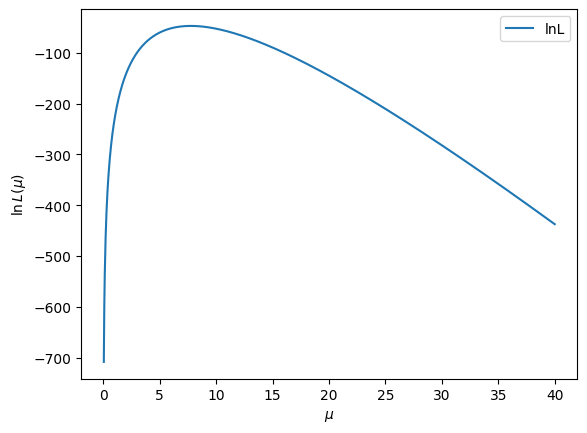

In [ ]:
mus = np.linspace(0,40,1000)
lnL_func =  sp.lambdify(mu, lnL, "numpy")
lnL_values = lnL_func(mus)
plt.plot(mus, lnL_values,label = 'lnL')
plt.ylabel('$\ln{L}(\mu)$')
plt.xlabel('$\mu$')
plt.legend()
plt.show()

Μεγιστοποιούμε το λογάριθμο του $L$, δεδομένου ότι ο λογάριθμος είναι μονότονη συνάρτηση και εμφανίζει ακρότατο στην ίδια τιμή με το όρισμά της. Έτσι έχουμε
$$
        \left.\frac{d \ln{L(\mu)} }{d \mu}\right\vert_{\mu = \hat{\mu}}  = 0 \rightarrow \hat{\mu} = 8.1
$$
Τώρα θα υπολογίσουμε το σφάλμα της εκτίμησης, προσεγγιστικά, με χρήση της Hessian,
$$
    H_{ij} = - \left \vert\frac{\partial^2 \ln{L} }{\partial \theta_{i} \partial \theta_j}\right\vert_{\bar{\theta} = \hat{\theta}}
$$
όπου στη δική μας περίπτωση έχουμε

In [ ]:
def Hessian(data,mu_bar):
    return  -Loglikelihood(data).diff(mu).diff(mu).subs(mu, mu_bar)
Hessian_val = Hessian(data,mu_bar)
Hessian_val

2.58064516129032

και έτσι προσεγγιστικά το σφάλμα της μεταβλητής $\mu$ είναι
$$
    \sigma_{\hat{\mu}} = \sqrt{H^{-1}}
$$

In [ ]:
sigma_mu_hat = 1/sp.sqrt(Hessian_val)
sigma_mu_hat

0.622494979899437

In [ ]:
mu_bar, lnL.subs(mu,mu_bar), sigma_mu_hat

(7.75000000000000, -46.7163662125988, 0.622494979899437)

Για την εύρεση του κεντρικού διαστήματος εμπιστοσύνης θεωρούμε τους τύπους
$$
    \begin{split}
        \mu_{up} &= \frac{1}{2} F_{\chi^2}^{-1}(1 - \alpha_{up}; 2(n+1))
        \\
        \mu_{lo} &= \frac{1}{2}F_{\chi^2}^{-1}(\alpha_{lo};2n)
    \end{split}
$$
όπου $n$ ο αριθμός των δεδομένων και $\alpha_{up} = \alpha_{lo} = \alpha/2$.

In [ ]:
mu_up  = 1/2 * stats.chi2.ppf(1 - alpha, 2 * (N + 1))
mu_down  = 1/2 * stats.chi2.ppf(alpha, 2 * N)

 Έτσι στη περίπτωση μας έχουμε

In [ ]:
mu_down, mu_up

(17.637464002295324, 22.901174046408407)

Επαναλαμβάνουμε τη διαδικασία μόνο για τη πρώτη τιμή από το σύνολο των 20 τιμών, όπου και έχουμε την Log-Likelihood

In [ ]:
lnL_dot = sp.log(f.subs(x, data[0])).expand(log=True,force=True).evalf()
lnL_dot

-\mu + 9.0*log(\mu) - 12.8018274800815

In [ ]:
mu_bar_dot = sp.solve(lnL_dot.diff(mu), mu)[0]
mu_bar_dot

9.00000000000000

In [ ]:
Hessian_dot = -lnL_dot.diff(mu).diff(mu).subs(mu, mu_bar_dot)
Hessian_dot

0.111111111111111

In [ ]:
sigma_mu_hat_dot = sp.sqrt(Hessian_dot)**-1
sigma_mu_hat_dot

3.00000000000000

In [ ]:
mu_up_dot  = 1/2 * stats.chi2.ppf(1 - alpha, 2 * (1 + 1))
mu_down_dot  = 1/2 * stats.chi2.ppf(alpha, 2 * 1)

In [ ]:
mu_down_dot, mu_up_dot

(0.3816997545579024, 2.3597843795584916)

## Άσκηση 4

Θεωρήστε μία τυχαία μεταβλητή που ακολουθεί κανονική κατανομή $X \sim N(\mu=30, \sigma=1)$. Να παράξετε ένα σύνολο Σ από $k=5,20,50$ ανεξάρτητες μετρήσεις της μεταβλητής . Θεωρώντας άγνωστες τις παραμέτρους της κατανομής, να αναφέρετε τα κεντρικά διαστήματα εμπιστοσύνης με $CL = 0.6827$ για την εκτίμηση αυτών. Να επαναλάβετε τη διαδικασία για 1000 τυχαία σύνολα ($\bar{x},s$) είναι ο αριθμητικός μέσος και η διασπορά, αντίστοιχα, του συνόλου Σ):
1. να δείξετε σε ιστόγραμμα την κατανομή της ποσότητας $\frac{\sqrt{k} \cdot (\bar{x} - \mu)}{s}$ για τα 1000 τυχαία σύνολα, 
2. να δείξετε σε ιστόγραμμα την κατανομή της ποσότητας  $\frac{ (k - 1) \cdot s^2}{\sigma^2}$ για τα 1000 τυχαία σύνολα,
3. να αναφέρετε το ποσοστό των διαστημάτων εμπιστοσύνης που περιέχουν τις πραγματικές τιμές των παραμέτρων της κατανομής.

### Λύση

In [25]:
import numpy as np
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt

Παράγουμε τα τυχαία σύνολα για κάθε $k$ και υπολογίζουμε αρχικά τη ποσότητα $\frac{\sqrt{k} \cdot (\bar{x} - \mu)}{s}$ και τη πλοτάρουμε

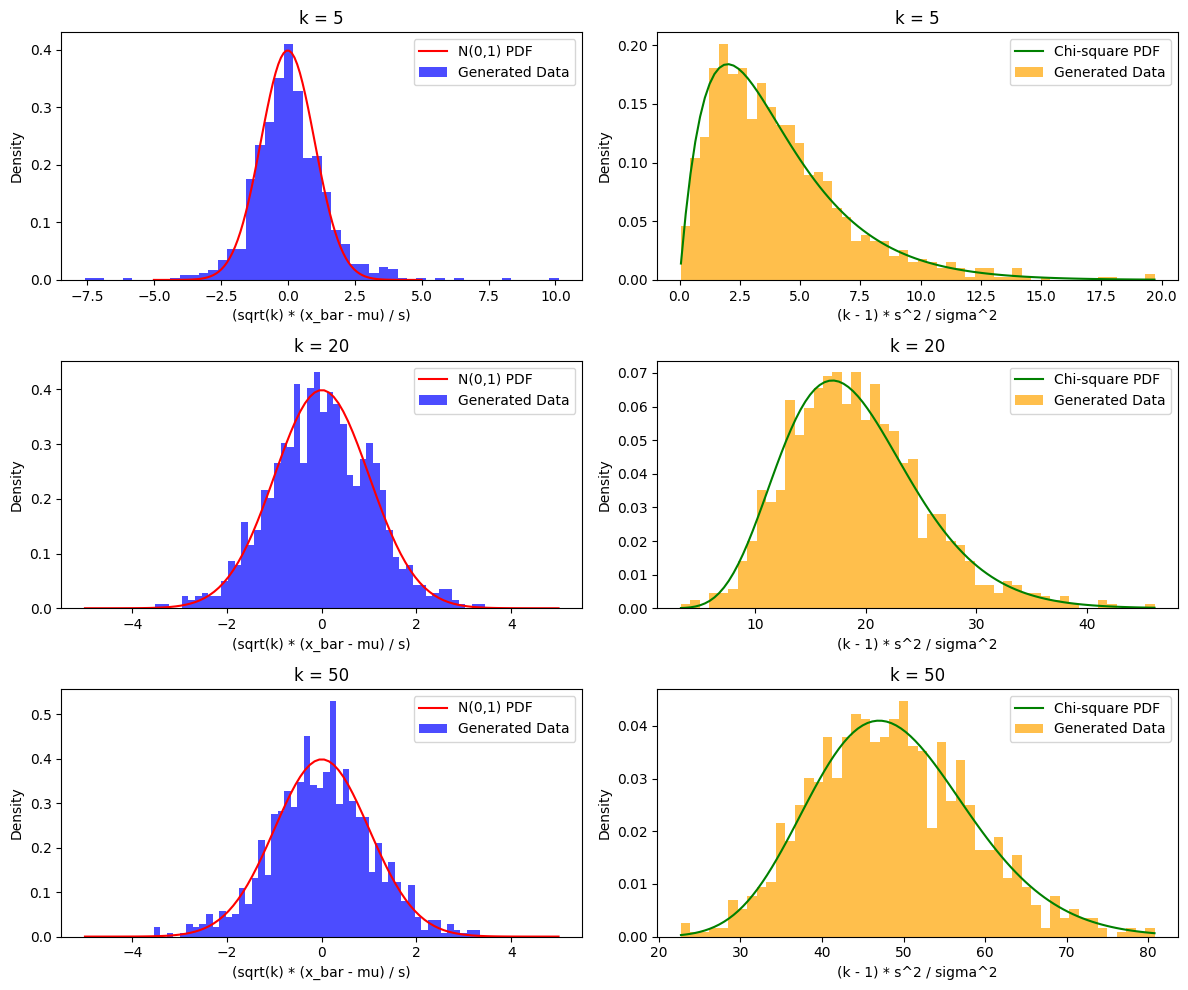

In [52]:
# Parameters
mu_true = 30
sigma_true = 1
k_values = [5, 20, 50]
CL = 0.6827
num_sets = 1000

# Initialize arrays to store results
coverage_counts = {'mu': np.zeros(len(k_values)), 'sigma': np.zeros(len(k_values))}

# Generate random sets and calculate statistics
z_values = np.zeros((len(k_values), num_sets))
chi_square_values = np.zeros((len(k_values), num_sets))

for i, k in enumerate(k_values):
    measurements = np.random.normal(mu_true, sigma_true, (k, num_sets))
    x_bar = np.mean(measurements, axis=0)
    s = np.std(measurements, axis=0, ddof=1)

    # Calculate confidence intervals
    z_percentile = (1 - CL) / 2 * 100
    z_lower = np.percentile(np.random.normal(0, 1, int(1e6)), z_percentile)
    z_upper = np.percentile(np.random.normal(0, 1, int(1e6)), 100 - z_percentile)
    mu_interval = (x_bar - s / np.sqrt(k) * z_upper, x_bar + s / np.sqrt(k) * z_upper)

    chi_square_percentile = (1 - CL) / 2 * 100
    chi_square_lower = chi2.ppf(chi_square_percentile / 100, df=k - 1)
    chi_square_upper = chi2.ppf(1 - chi_square_percentile / 100, df=k - 1)
    sigma_interval = ((k - 1) * s ** 2 / chi_square_upper, (k - 1) * s ** 2 / chi_square_lower)

    # Check if true values are within the calculated intervals
    coverage_counts['mu'][i] = np.sum((mu_interval[0] <= mu_true) & (mu_true <= mu_interval[1]))
    coverage_counts['sigma'][i] = np.sum((sigma_interval[0] <= sigma_true ** 2) & (sigma_true ** 2 <= sigma_interval[1]))

    # Store z and chi-square values
    z_values[i] = np.sqrt(k) * (x_bar - mu_true) / s
    chi_square_values[i] = (k - 1) * s ** 2 / sigma_true ** 2

# Create a 3x2 grid of plots
fig, axes = plt.subplots(len(k_values), 2, figsize=(12, 10))

for i, k in enumerate(k_values):
    # Plot normal distribution PDF
    x = np.linspace(-5, 5, 100)
    normal_pdf = norm.pdf(x, loc=0, scale=1)
    axes[i, 0].plot(x, normal_pdf, color='red', label='N(0,1) PDF')
    axes[i, 0].hist(z_values[i], bins=50, color='blue', alpha=0.7, density=True, label='Generated Data')
    axes[i, 0].set_title(f'k = {k}')
    axes[i, 0].legend()
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].set_xlabel('(sqrt(k) * (x_bar - mu) / s)')
    
    # Chi-square distribution and generated data
    chi_square_x = np.linspace(chi_square_values[i].min(), chi_square_values[i].max(), 100)
    chi_square_y = chi2.pdf(chi_square_x, df=k - 1)
    axes[i, 1].plot(chi_square_x, chi_square_y, color='green', label='Chi-square PDF')
    axes[i, 1].hist(chi_square_values[i], bins=50, color='orange', alpha=0.7, density=True, label='Generated Data')
    axes[i, 1].set_title(f'k = {k}')
    axes[i, 1].legend()
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].set_xlabel('(k - 1) * s^2 / sigma^2')

plt.tight_layout()
plt.show()


In [53]:
# Calculate and report coverage percentages
coverage_percentage_mu = coverage_counts['mu'] / num_sets * 100
coverage_percentage_sigma = coverage_counts['sigma'] / num_sets * 100

for i, k in enumerate(k_values):
    print(f'Coverage percentage for mu (k = {k}): {coverage_percentage_mu[i]:.2f}%')
    print(f'Coverage percentage for sigma (k = {k}): {coverage_percentage_sigma[i]:.2f}%')

Coverage percentage for mu (k = 5): 62.80%
Coverage percentage for sigma (k = 5): 70.30%
Coverage percentage for mu (k = 20): 64.80%
Coverage percentage for sigma (k = 20): 70.40%
Coverage percentage for mu (k = 50): 68.70%
Coverage percentage for sigma (k = 50): 68.60%


## Άσκηση 5

Το φροντιστήριο Α είχε 40 μαθητές Γ" Λυκείου, από τους οποίους οι 30 πέτυχαν στις Πανελλαδικές εξετάσεις. Το φροντιστήριο Β είχε 200 μαθητές από τους οποίους πέτυχαν οι 130. Ποια είναι τα διαστήματα εμπιστοσύνης (μέθοδοι Wilson και Clopper-Pearson) με $CL = 0.95$ για το ποσοστό επιτυχίας κάθε φροντιστηρίου? Θεωρήστε ότι ο αριθμός των επιτυχόντων ακολουθεί διωνυμική κατανομή με κάποια πιθανότητα $p$. Ποιο από τα δύο φροντιστήρια θα εμπιστευόσασταν περισσότερο? Αν την επόμενη χρονιά το φροντιστήριο Β έχει 180 μαθητές, μπορείτε να προβλέψετε (κεντρική τιμή και σφάλμα με $CL = 68.27\%$) τον αριθμό αυτών που θα πετύχουν;

### Λύση

In [37]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, binom

In [38]:
CL_1 = 0.95
CL_2 = 0.6827
nA = 40
xA = 30
nB = 200
xB = 130

In [39]:
def calculate_p1A(xA, nA, CL):
    numerator = xA * stats.f.ppf(1 - CL, 2 * xA, 2 * (nA - xA + 1))
    denominator = (nA - xA + 1) + xA * stats.f.ppf(1 - CL, 2 * xA, 2 * (nA - xA + 1))
    p1A = numerator / denominator
    return p1A

def calculate_p2A(xA, nA, CL):
    numerator = (xA + 1) * stats.f.ppf(CL, 2 * (xA + 1), 2 * (nA - xA))
    denominator = nA - xA + (xA + 1) * stats.f.ppf(CL, 2 * (xA + 1), 2 * (nA - xA))
    p2A = numerator / denominator
    return p2A

In [40]:
z = norm.ppf((1 - CL_1) / 2)

In [41]:
P_1 = xA/nA
P_WA1 = (P_1 + z**2 /(2*nA))/(1 + z**2 /(2*nA)) + z/(1 + z**2/nA)*np.sqrt(P_1*(1 - P_1)/nA + z**2 /(4*nA**2))
P_WA2 = (P_1 + z**2 /(2*nA))/(1 + z**2 /(2*nA)) - z/(1 + z**2/nA)*np.sqrt(P_1*(1 - P_1)/nA + z**2 /(4*nA**2))


In [42]:
P_2 = xB/nB
P_WB1 = (P_2 + z**2 /(2*nB))/(1 + z**2 /(2*nB)) + z/(1 + z**2/nB)*np.sqrt(P_2*(1 - P_2)/nB + z**2 /(4*nB**2))
P_WB2 = (P_2 + z**2 /(2*nB))/(1 + z**2 /(2*nB)) - z/(1 + z**2/nB)*np.sqrt(P_2*(1 - P_2)/nB + z**2 /(4*nB**2))


In [43]:
P_1,calculate_p1A(xA, nA, CL_1),calculate_p2A(xA, nA, CL_1)

(0.75, 0.6129397599079813, 0.8576301171429791)

In [44]:
P_2,calculate_p1A(xB, nB, CL_1), calculate_p2A(xB, nB, CL_1) 

(0.65, 0.5906098583232077, 0.7060236063205709)

In [45]:
P_WA1, P_WA2, P_WB1, P_WB2

(0.6314203184755232, 0.8914887462922403, 0.5877907453339946, 0.718867860700013)

In [51]:
probability1A = binom.pmf(30, 40, 0.75)
probability2A = binom.pmf(130, 200, 0.75)

In [52]:
probability1A, probability2A

(0.14436434635625658, 0.0004183649532226183)

In [53]:
nBd = 180
xBd = nBd * P_2
xBd

117.0

In [55]:
calculate_p1A(xBd, nBd, CL_2), calculate_p2A(xBd, nBd, CL_2)

(0.6299263829026039, 0.6692058124761145)

In [57]:
int(calculate_p1A(xBd, nBd, CL_2)*nBd), int(calculate_p2A(xBd, nBd, CL_2)*nBd)

(113, 120)

# Έργασία 4

## Άσκηση 1

Δίνεται ένα τυχαίο δείγμα 9 μετρήσεων από έναν πληθυσμό με κανονική κατανομή $N(\mu, \sigma = 1)$ και θέλουμε να ελέγξουμε την υπόθεση $H_0: \mu=20$ ως προς την εναλλακτική $H_1: \mu=22$, χρησιμοποιώντας το ακόλουθο κριτήριο: απορρίπτουμε την $H_0$ αν $\bar{x} \geq 21$. Υπολογίστε τα σφάλματα Τύπου $I$, $II$ καθώς και τη δύναμη του κριτηρίου. Πόσο είναι το μέγεθος του τεστ;

### Λύση

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Parameters
mu_null = 20
mu_alternative = 22
sigma = 1
sample_size = 9
criterion_threshold = 21

# Calculate probabilities under null hypothesis
z_critical = (criterion_threshold - mu_null) / (sigma / np.sqrt(sample_size))
prob_type_I = 1 - norm.cdf(z_critical)

# Calculate probabilities under alternative hypothesis
z_critical_alternative = (criterion_threshold - mu_alternative) / (sigma / np.sqrt(sample_size))
prob_type_II = norm.cdf(z_critical_alternative)

# Calculate power of the test
power = 1 - prob_type_II

print("Type I error probability:", prob_type_I)
print("Type II error probability:", prob_type_II)
print("Power of the test:", power)


Type I error probability: 0.0013498980316301035
Type II error probability: 0.001349898031630093
Power of the test: 0.9986501019683699


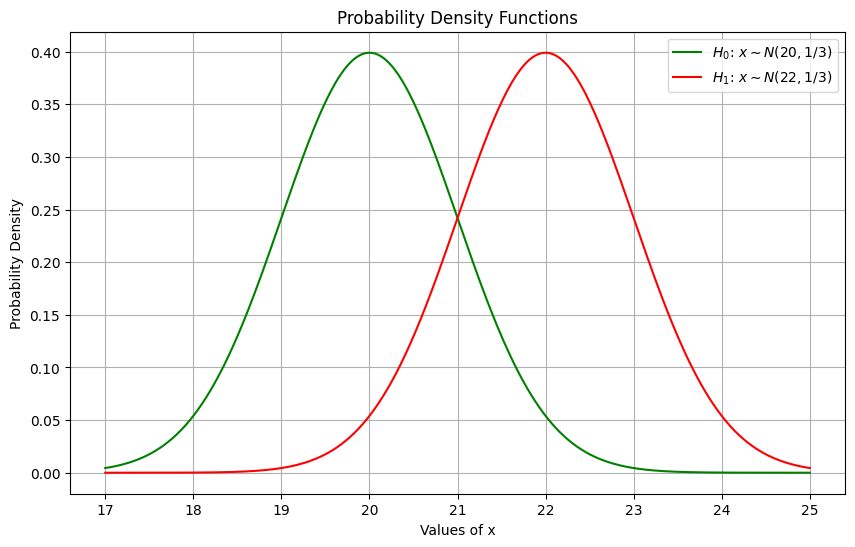

In [4]:
x_range = np.linspace(17, 25, 500)

# Calculate PDF values
pdf_null = norm.pdf(x_range, mu_null, sigma)
pdf_alternative = norm.pdf(x_range, mu_alternative, sigma)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_range, pdf_null, label=r'$H_0$: $x \sim N(20, 1/3)$', color='green')
plt.plot(x_range, pdf_alternative, label=r'$H_1$: $x \sim N(22, 1/3)$', color='red')
plt.xlabel('Values of x')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions')
plt.legend()
plt.grid(True)
plt.show()

## Άσκηση 2

Οι πυκνότητες πιθανότητας δύο τυχαίων μεταβλητών καταγράφονται στον παρακάτω πίνακα, οργανωμένες σε διαμέρηση (bins) μεγέθους 0.5 από -3.0 έως 3.0. Να κάνετε τα διαγράμματα των ιστογραμμάτων και να εξετάσετε αν οι μεταβλητές αυτές ακολουθούν την τυποποιημένη κανονική κατανομή (να συγκρίνετε την τιμή των δεδομένων σε κάθε bin με την θεωρητική πρόβλεψη για το σημείο στο κέντρο του bin). Χρησιμοποιήστε το Pearson's-$\chi ^2$ τεστ με $\alpha =0.1$ και το RUN τεστ.

| BIN | ΟΡΙΑ | PDF1 * dx | PDF2 * dx |
| :-: | :-: | :-: |  :-: | 
| 1  |  $[-3.0,-2.5]  $   | 0.0042 $\pm$ 0.0009 | 0.0056 $\pm$ 0.0011 |
| 2	 |  $[-2.5,-2.0]  $   | 0.0186 $\pm$ 0.0019 | 0.0214 $\pm$ 0.0021 |
| 3  |  $[-2.0,-1.5]  $   | 0.0422 $\pm$ 0.0029 | 0.0422 $\pm$ 0.0029 |
| 4  |  $[-1.5,-1.0]  $   | 0.0926 $\pm$ 0.0043 | 0.0844 $\pm$ 0.0041 |
| 5  |  $[-1.0,-0.5]  $   | 0.1456 $\pm$ 0.0054 | 0.1296 $\pm$ 0.0051 |
| 6  |  $[-0.5,0.0]  $    | 0.1886 $\pm$ 0.0061 | 0.1660 $\pm$ 0.0058 |
| 7  |  $[0.0,0.5]  $     | 0.1866 $\pm$ 0.0061 | 0.1736 $\pm$ 0.0059 |
| 8  |  $[0.5,1.0]  $     | 0.1514 $\pm$ 0.0055 | 0.1536 $\pm$ 0.0055 |
| 9  |  $[1.0,1.5]  $     | 0.0894 $\pm$ 0.0042 | 0.1072 $\pm$ 0.0046 |
| 10 |  $[1.5,2.0]  $     | 0.0546 $\pm$ 0.0033 | 0.0626 $\pm$ 0.0035 |
| 11 |  $[2.0,2.5]  $     | 0.0176 $\pm$ 0.0019 | 0.0340 $\pm$ 0.0026 |
| 12 |  $[2.5,3.0]  $     | 0.0066 $\pm$ 0.0011 | 0.0136 $\pm$ 0.0016 |




### Λύση

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

Πολλαπλασιάζω επί 2 γιατί το $dx$ είναι ίσο με 0.5

In [ ]:
# Data
bin_edges = [-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
pdf1_values = np.array([0.0042, 0.0186, 0.0422, 0.0926, 0.1456, 0.1886, 0.1866, 0.1514, 0.0894, 0.0546, 0.0176, 0.0066]) * 2
pdf2_values = np.array([0.0056, 0.0214, 0.0422, 0.0844, 0.1296, 0.1660, 0.1736, 0.1536, 0.1072, 0.0626, 0.0340, 0.0136]) * 2
pdf1_uncertainty = np.array([0.0009, 0.0019, 0.0029, 0.0043, 0.0054, 0.0061, 0.0061, 0.0055, 0.0042, 0.0033, 0.0019, 0.0011]) * 2
pdf2_uncertainty = np.array([0.0011, 0.0021, 0.0029, 0.0041, 0.0051, 0.0058, 0.0059, 0.0055, 0.0046, 0.0035, 0.0026, 0.0016]) * 2

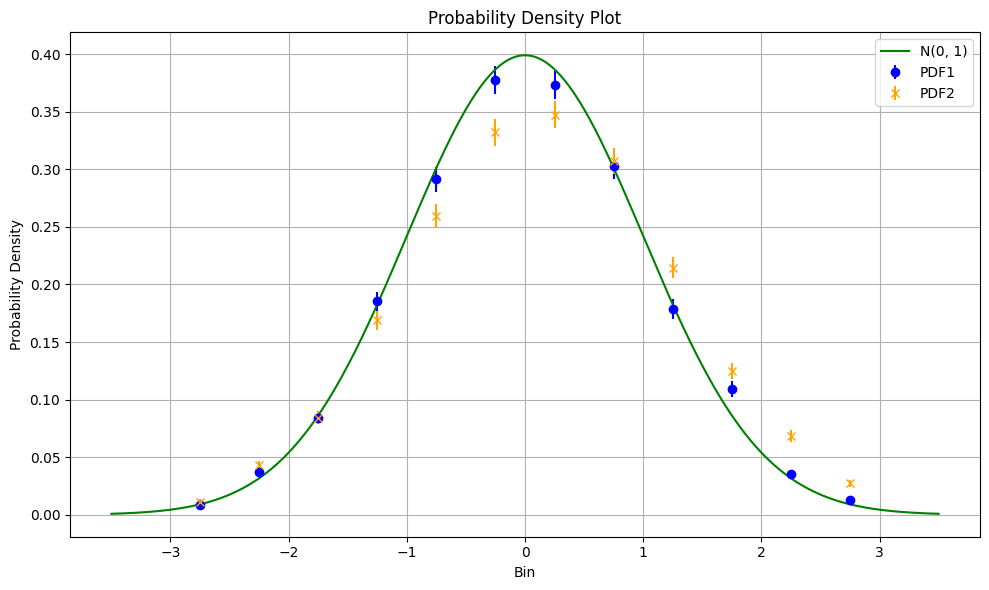

In [ ]:

# Bin centers
bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]

# Normal distribution PDF (0,1)
x_range = np.linspace(-3.5, 3.5, 500)
pdf_normal = norm.pdf(x_range, 0, 1)

# Create the plot
plt.figure(figsize=(10, 6))

plt.errorbar(bin_centers, pdf1_values, yerr=pdf1_uncertainty, fmt='o', label='PDF1', color='blue')
plt.errorbar(bin_centers, pdf2_values, yerr=pdf2_uncertainty, fmt='x', label='PDF2', color='orange')
plt.plot(x_range, pdf_normal, label='N(0, 1)', color='green')

plt.xlabel('Bin')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Improved spacing
plt.show()

In probability and statistics, there are different ways to calculate p-values, and slight variations in calculation methods or parameters can lead to different results. The two most common approaches are:

Using the Cumulative Distribution Function (CDF):
In the Python code you provided, you are calculating the p-value using the cumulative distribution function (chi2.cdf) of the chi-squared distribution. This calculates the probability of observing a value less than or equal to the given chi-squared statistic.

Using the Survival Function (1 - CDF):
In the Mathematica code you provided, you are calculating the p-value using the survival function, which is 1 - CDF. This calculates the probability of observing a value greater than the given chi-squared statistic.

Both approaches are valid and commonly used for hypothesis testing. However, they result in different p-values because they are calculating probabilities for different regions of the distribution.

If you want to achieve consistent results between Mathematica and Python, you need to use the same approach in both cases. In your case, you might want to use the survival function in Python as well. 

In [ ]:
alpha = 0.1
def Pearson_chi2(bin_centers, pdf_values, pdf_uncertainty):
    w1 = 1 / pdf_uncertainty**2
    # Calculate the chi-squared statistic
    chi_squared_stat = np.sum(w1 * (norm.pdf(bin_centers) - pdf_values)**2)

    # Calculate the degrees of freedom
    df = len(pdf_values)

    # Calculate the p-value using the chi-squared distribution
    p_value_chi1 = chi2.sf(chi_squared_stat, df)
    # Compare the p-value to the significance level
    if p_value_chi1 < alpha:
        result = True
    else:
        result = False

    return chi_squared_stat, p_value_chi1, result

In [ ]:
Pearson_chi2(bin_centers,pdf1_values,pdf1_uncertainty)

(21.68237211420947, 0.04123773549736338, True)

In [ ]:
Pearson_chi2(bin_centers,pdf2_values,pdf2_uncertainty)

(184.8839094381301, 4.236483306104561e-33, True)

In [ ]:
def RUN_test(bin_centers, pdf1_values):
    y_expected = norm.pdf(bin_centers, 0, 1)
    model_data1 = pdf1_values - y_expected

    N_p = len([num for num in model_data1 if num > 0])
    N_m = len([num for num in  model_data1 if num < 0])

    sign_changes = np.where(np.sign(model_data1[:-1]) != np.sign(model_data1[1:]))[0]
    r = len(sign_changes) + 1
    E_r = 1 + (2*N_p * N_m)/( N_p + N_m)
    V_r = (2* N_p *N_m)* (2*N_p *N_m  - N_p - N_m)/((N_p + N_m)**2 *(N_p + N_m - 1)) 
    z = (r -E_r)/(np.sqrt(V_r))
    p_value = 2*(1 - norm.cdf(abs(z),0,1))
    return r, p_value, z, V_r


In [ ]:
RUN_test(bin_centers, pdf2_values)

(3, 0.016648970490260595, -2.3943694213943623, 2.563131313131313)

In [ ]:
def tot_p_value(bin_centers, pdf_values, pdf_uncertainty):
    p_value_chi2 = Pearson_chi2(bin_centers,pdf_values,pdf_uncertainty)[1]
    p_value_run = RUN_test(bin_centers, pdf_values)[1]
    return p_value_chi2*p_value_run * (1 - np.log(p_value_chi2*p_value_run))

In [ ]:
tot_p_value(bin_centers, pdf1_values, pdf1_uncertainty)

0.10774678046166625

## Άσκηση 3

Δύο μηχανές $M_1$ και $M_2$ αυτόματης συσκευασίας έχουν ρυθμιστεί έτσι
ώστε να γεμίζουν πακέτα βάρους 1 $kg$. Υπάρχουν υπόνοιες ότι οι δύο μηχανές δεν
λειτουργούν ομοιόμοφα ως προς τη μάζα του περιεχομένου. Για το λόγο αυτό,
λαμβάνονται 100 πακέτα από την παραγωγή κάθε μηχανής και βρίσκεται ότι οι
δειγματικοί μέσοι είναι αντίστοιχα 1.07 και 1.18 $kg$. Από προηγούμενες
παρατηρήσεις γνωρίζουμε ότι $\sigma_1 = 0.10$ και $\sigma_2 = 0.12 kg$. 
1. Υπάρχει πράγματι διαφορά μεταξύ των δύο μηχανών, σε επίπεδο σημαντικότητας 0.05;
2. Να βρείτε την ισχύ του τεστ του 1ου ερωτήματος όταν η μέση μάζα του πακέτου της μηχανής $M_2$ είναι κατά $ \delta kg$ μεγαλύτερη από αυτή της $M_1$.

### Λύση

In [7]:
import numpy as np
import scipy.stats as stats

In [8]:
mu_1 = 1.07
sigma_1 = 0.1
mu_2 = 1.18
sigma_2 = 0.12

In [9]:
F = sigma_2**2 / sigma_1 **2 
F

1.4399999999999997

In [10]:
n = 100
alpha = 0.05
F_ratio = stats.f.ppf(1 - alpha/2, n - 1, n - 1)
F_ratio

1.4862337676192978

In [11]:
if F < F_ratio:
    print(True)
else:
    print(False)

True


In [13]:
S = np.sqrt( ((n-1)*sigma_1 **2 + (n-1)* sigma_2 **2)/ (n+n-2)   )
S

0.11045361017187262

In [15]:
z = (mu_1 - mu_2)/(S* np.sqrt(1/n + 1/n))
z 

-7.04202839630927

In [17]:
za1 = stats.norm.ppf(alpha/2)
za1

-1.9599639845400545

In [25]:
delta = 0.0001
beta = stats.norm.cdf(za1, loc=delta / (S * (1 / n + 1 / n)**0.5 + za1), scale=1)
beta

0.025003006054025598

In [28]:
power = 1 - beta
power

0.9749969939459744

## Άσκηση 4

Δύο διαφορετικά ηλεκτρονικά όργανα Α και Β χρησιμοποιούνται για την μέτρηση της πίεσης του ματιού. Ενδιαφερόμαστε να συγκρίνουμε τα όργανα αυτά ως προς την ποιότητά τους, δηλαδή να συγκρίνουμε την μεταβλητότητα επανειλημμένων μετρήσεων στο ίδιο μάτι, την ίδια περίπου χρονική στιγμή. Με το όργανο Α κάναμε 10 μετρήσεις και βρήκαμε διασπορά δείγματος $S_A ^2=1.25$, ενώ με το όργανο Β κάναμε 8 μετρήσεις με διασπορά δείγματος $S_B ^2 = 0.28$. Να ελέγξετε την υπόθεση ότι τα δύο όργανα έχουν ίδια ποιότητα (ακρίβεια μετρήσεων) σε επίπεδο σημαντικότητας 10\%. 

### Λύση

In [1]:
import numpy as np
import scipy.stats as stats

In [2]:
SA2 = 1.25
SB2 = 0.28
alpha = 0.1
nA = 10
nB = 8

In [3]:
F = SB2/SA2
F

0.22400000000000003

In [8]:
Fratio = stats.f.ppf(1 - alpha/2, nB - 1, nA - 1)
Fratio

3.29274583891712

## Άσκηση 5

Έστω δύο τυχαίες μεταβλητές που ακολουθούν αντίστοιχα ομοιόμορφη κατανομή στο διάστημα [0, 1] και τυποποιημένη κανονική κατανομή N(0,1). Να παράξετε ένα τυχαίο σύνολο $n=10$ τιμών για κάθε μεταβλητή και να παραστήσετε γραφικά τις δύο αθροιστικές κατανομές (σε διαφορετικά διαγράμματα) συγκρινόμενες με τις αντίστοιχες θεωρητικές. Πόση είναι σε κάθε περίπτωση η μέγιστη απόλυτη απόκλιση $D$? Να επαναλάβετε τη διαδικασία 10000 φορές και να κάνετε την κατανομή της ποσότητας  $\sqrt{n} \cdot D$ για κάθε περίπτωση. Αποφανθείτε για την συμβατότητα των κατανομών (π.χ. με τεστ $\chi ^2$). Στη συνέχεια να επαναλάβετε όλα τα βήματα παράγοντας τυχαία σύνολα 100 τιμών.

### Λύση

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
n = 10
ndot = 100
rline1 = n - 2
rline2 = ndot - 2

In [4]:
Y = np.random.uniform(0,1,n)
Y100 = np.random.uniform(0,1,ndot)
X = np.random.normal(0,1,n)
X100 = np.random.normal(0,1,ndot)

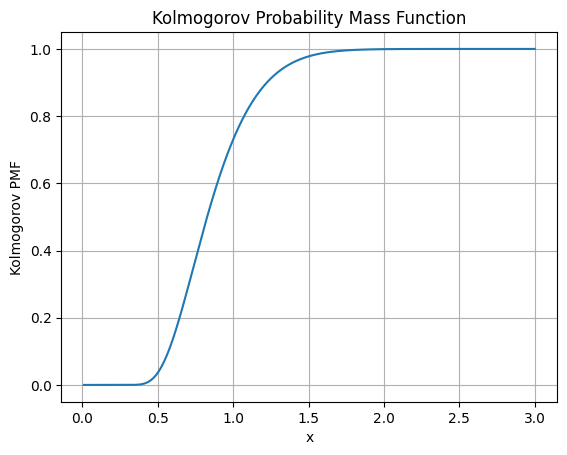

In [5]:
x_values = np.linspace(0.01, 3, 500)  # Range of x values

def kolmogorov_pmf(x, k_max=50):
    sum_result = sum([np.exp(-(2 * k - 1)**2 * np.pi**2 / (8 * x**2)) for k in range(1, k_max + 1)])
    return (np.sqrt(2 * np.pi) / x) * sum_result

pdf_values = [kolmogorov_pmf(x) for x in x_values]

plt.plot(x_values, pdf_values)
plt.xlabel('x')
plt.ylabel('Kolmogorov PMF')
plt.title('Kolmogorov Probability Mass Function')
plt.grid(True)
plt.show()


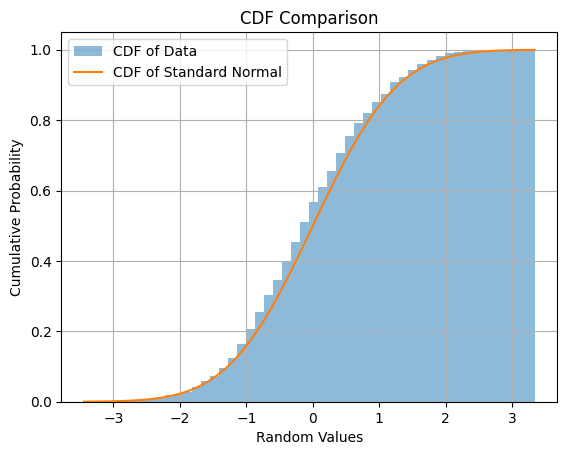

In [6]:
# Generate example data
X = np.random.normal(0, 1, 1000)

# Create histogram
plt.hist(X, bins=50, density=True, cumulative=True, alpha=0.5, label="CDF of Data")

# Create CDF plot of the normal distribution
x_values = np.linspace(min(X), max(X), 100)
plt.plot(x_values, stats.norm.cdf(x_values), label="CDF of Standard Normal")

# Add labels and legend
plt.xlabel("Random Values")
plt.ylabel("Cumulative Probability")
plt.title("CDF Comparison")
plt.legend()

plt.grid(True)
plt.show()

In [7]:
n = len(X)
ecdf_values = np.arange(0, n) / n
sorted_X = np.sort(X)
normal_cdf_values = stats.norm.cdf(sorted_X)

max_abs_diff = np.max(np.abs(ecdf_values - normal_cdf_values))
print(max_abs_diff)

0.036784978627624865


In [8]:
# Perform the Kolmogorov-Smirnov test and extract the test statistic
test_statistic, p_value = stats.kstest(X, 'norm', args=(0, 1), method='approx')
print(test_statistic)

0.037784978627624866


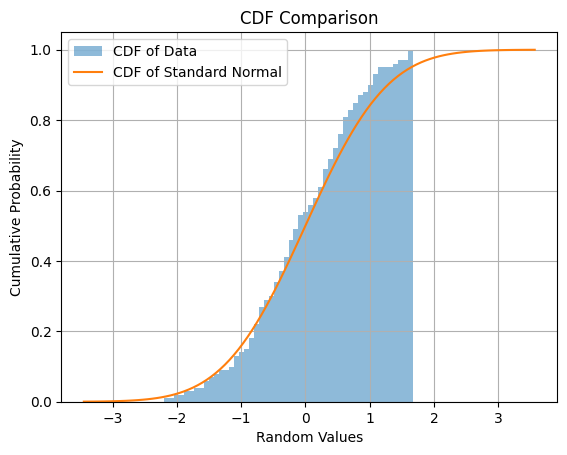

In [9]:
# Generate example data
X = np.random.normal(0, 1, 1000)

# Create histogram
plt.hist(X100, bins=50, density=True, cumulative=True, alpha=0.5, label="CDF of Data")

# Create CDF plot of the normal distribution
x_values = np.linspace(min(X), max(X), 100)
plt.plot(x_values, stats.norm.cdf(x_values), label="CDF of Standard Normal")

# Add labels and legend
plt.xlabel("Random Values")
plt.ylabel("Cumulative Probability")
plt.title("CDF Comparison")
plt.legend()

plt.grid(True)
plt.show()

In [10]:
n = len(X100)
ecdf_values = np.arange(0, n) / n
sorted_X = np.sort(X100)
normal_cdf_values = stats.norm.cdf(sorted_X)

max_abs_diff = np.max(np.abs(ecdf_values - normal_cdf_values))
print(max_abs_diff)

0.06093533154189967


In [11]:
# Perform the Kolmogorov-Smirnov test and extract the test statistic
test_statistic, p_value = stats.kstest(X100, 'norm', args=(0, 1), method='approx')
print(test_statistic)

0.07093533154189968


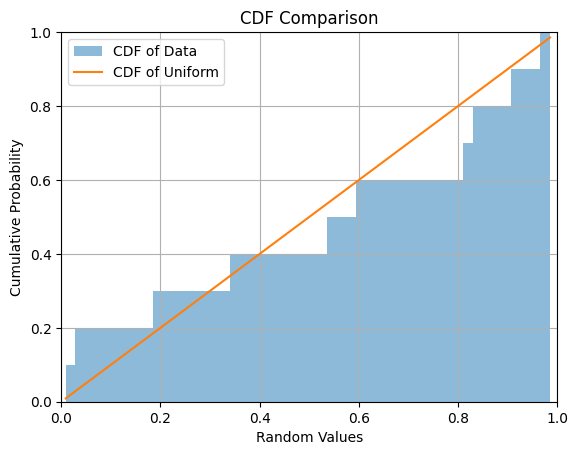

In [12]:
# Create histogram
plt.hist(Y, bins=50, density=True, cumulative=True, alpha=0.5, label="CDF of Data")

# Create CDF plot of the uniform distribution
x_values = np.linspace(min(Y), max(Y), 100)
plt.plot(x_values, stats.uniform.cdf(x_values), label="CDF of Uniform")

# Set plot range and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Random Values")
plt.ylabel("Cumulative Probability")
plt.title("CDF Comparison")
plt.legend()

plt.grid(True)
plt.show()

In [13]:
n = len(Y)
ecdf_values = np.arange(0, n) / n
sorted_X = np.sort(Y)
normal_cdf_values = stats.norm.cdf(sorted_X)

max_abs_diff = np.max(np.abs(ecdf_values - normal_cdf_values))
print(max_abs_diff)

0.5035800500995381


In [14]:
# Perform the Kolmogorov-Smirnov test and extract the test statistic
test_statistic, p_value = stats.kstest(Y, 'norm', args=(0, 1), method='approx')
print(test_statistic)

0.5035800500995381


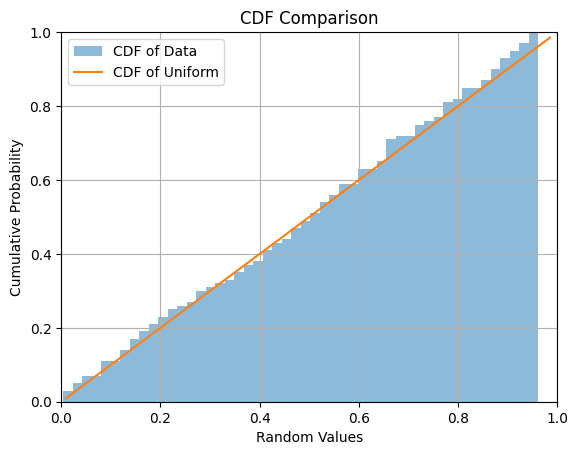

In [15]:
# Create histogram
plt.hist(Y100, bins=50, density=True, cumulative=True, alpha=0.5, label="CDF of Data")

# Create CDF plot of the uniform distribution
x_values = np.linspace(min(Y), max(Y), 100)
plt.plot(x_values, stats.uniform.cdf(x_values), label="CDF of Uniform")

# Set plot range and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Random Values")
plt.ylabel("Cumulative Probability")
plt.title("CDF Comparison")
plt.legend()

plt.grid(True)
plt.show()

In [16]:
n = len(Y100)
ecdf_values = np.arange(0, n) / n
sorted_X = np.sort(Y100)
normal_cdf_values = stats.norm.cdf(sorted_X)

max_abs_diff = np.max(np.abs(ecdf_values - normal_cdf_values))
print(max_abs_diff)

0.5015266173106049


In [17]:
# Perform the Kolmogorov-Smirnov test and extract the test statistic
test_statistic, p_value = stats.kstest(Y100, 'norm', args=(0, 1), method='approx')
print(test_statistic)

0.5015266173106049


C:\Users\nkout\AppData\Local\Temp\ipykernel_27284\1056019454.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  sum_result = sum([np.exp(-(2 * k - 1)**2 * np.pi**2 / (8 * x**2)) for k in range(1, k_max + 1)])
C:\Users\nkout\AppData\Local\Temp\ipykernel_27284\1056019454.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (np.sqrt(2 * np.pi) / x) * sum_result
C:\Users\nkout\AppData\Local\Temp\ipykernel_27284\1056019454.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  return (np.sqrt(2 * np.pi) / x) * sum_result


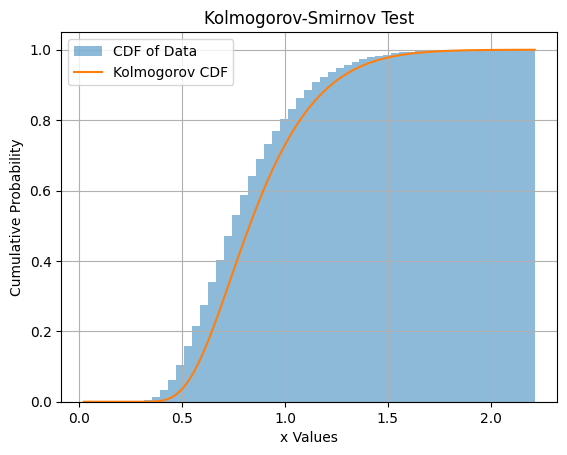

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Number of samples and size of each sample
num_samples = 10000
sample_size = 100

# Generate random samples
X_samples = np.random.normal(0, 1, (num_samples, sample_size))

# Calculate the KS statistic for each sample
ecdf_values = np.arange(1, sample_size + 1) / sample_size
sorted_X_samples = np.sort(X_samples, axis=1)
normal_cdf_values = stats.norm.cdf(sorted_X_samples)
max_ks_values = np.max(np.abs(ecdf_values - normal_cdf_values), axis=1) * np.sqrt(sample_size)

# Create histogram
plt.hist(max_ks_values, bins=50, density=True, cumulative=True, alpha=0.5, label="CDF of Data")

# Create Kolmogorov CDF plot
x_values = np.linspace(0, max(max_ks_values), 100)
kolmogorov_cdf_values = np.array([kolmogorov_pmf(x, k_max=50) for x in x_values])
plt.plot(x_values, kolmogorov_cdf_values, label="Kolmogorov CDF")

# Set plot labels, title, and legend
plt.xlabel("x Values")
plt.ylabel("Cumulative Probability")
plt.title("Kolmogorov-Smirnov Test")
plt.legend()

plt.grid(True)
plt.show()


C:\Users\nkout\AppData\Local\Temp\ipykernel_27284\1056019454.py:4: RuntimeWarning: divide by zero encountered in divide
  sum_result = sum([np.exp(-(2 * k - 1)**2 * np.pi**2 / (8 * x**2)) for k in range(1, k_max + 1)])
C:\Users\nkout\AppData\Local\Temp\ipykernel_27284\1056019454.py:5: RuntimeWarning: divide by zero encountered in divide
  return (np.sqrt(2 * np.pi) / x) * sum_result
C:\Users\nkout\AppData\Local\Temp\ipykernel_27284\1056019454.py:5: RuntimeWarning: invalid value encountered in multiply
  return (np.sqrt(2 * np.pi) / x) * sum_result


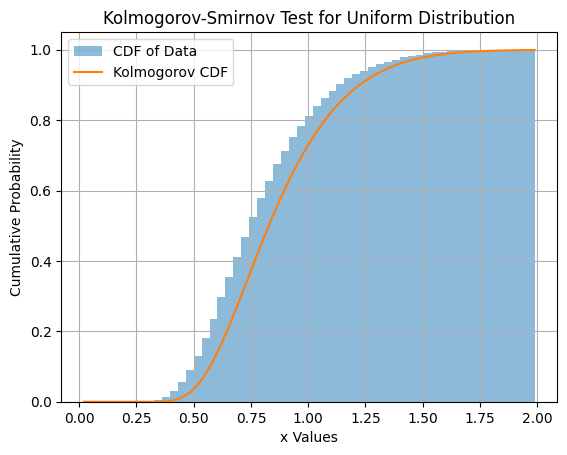

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Number of samples and size of each sample
num_samples = 10000
sample_size = 100

# Generate random samples
Y_samples = np.random.uniform(0, 1, (num_samples, sample_size))

# Calculate the KS statistic for each sample
ecdf_values = np.arange(1, sample_size + 1) / sample_size
sorted_Y_samples = np.sort(Y_samples, axis=1)
uniform_cdf_values = stats.uniform.cdf(sorted_Y_samples)
max_ks_values = np.max(np.abs(ecdf_values - uniform_cdf_values), axis=1) * np.sqrt(sample_size)

# Create histogram
plt.hist(max_ks_values, bins=50, density=True, cumulative=True, alpha=0.5, label="CDF of Data")

# Create Kolmogorov CDF plot
x_values = np.linspace(0, max(max_ks_values), 100)
kolmogorov_cdf_values = kolmogorov_pmf(x_values, k_max=50)
plt.plot(x_values, kolmogorov_cdf_values, label="Kolmogorov CDF")

# Set plot labels, title, and legend
plt.xlabel("x Values")
plt.ylabel("Cumulative Probability")
plt.title("Kolmogorov-Smirnov Test for Uniform Distribution")
plt.legend()

plt.grid(True)
plt.show()


C:\Users\nkout\AppData\Local\Temp\ipykernel_27284\1056019454.py:4: RuntimeWarning: divide by zero encountered in divide
  sum_result = sum([np.exp(-(2 * k - 1)**2 * np.pi**2 / (8 * x**2)) for k in range(1, k_max + 1)])
C:\Users\nkout\AppData\Local\Temp\ipykernel_27284\1056019454.py:5: RuntimeWarning: divide by zero encountered in divide
  return (np.sqrt(2 * np.pi) / x) * sum_result
C:\Users\nkout\AppData\Local\Temp\ipykernel_27284\1056019454.py:5: RuntimeWarning: invalid value encountered in multiply
  return (np.sqrt(2 * np.pi) / x) * sum_result


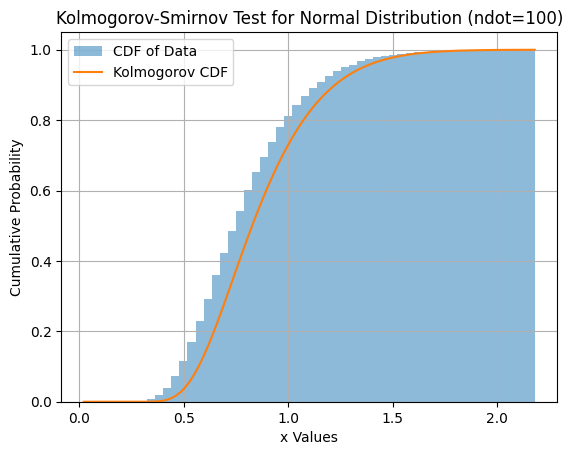

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Number of samples and size of each sample
num_samples = 10000
ndot = 100

# Generate random samples
X_samples = np.random.normal(0, 1, (num_samples, ndot))

# Calculate the KS statistic for each sample
ecdf_values = np.arange(1, ndot + 1) / ndot
sorted_X_samples = np.sort(X_samples, axis=1)
normal_cdf_values = stats.norm.cdf(sorted_X_samples)
max_ks_values = np.max(np.abs(ecdf_values - normal_cdf_values), axis=1) * np.sqrt(ndot)

# Create histogram
plt.hist(max_ks_values, bins=50, density=True, cumulative=True, alpha=0.5, label="CDF of Data")

# Create Kolmogorov CDF plot
x_values = np.linspace(0, max(max_ks_values), 100)
kolmogorov_cdf_values =  kolmogorov_pmf(x_values, k_max=50)
plt.plot(x_values, kolmogorov_cdf_values, label="Kolmogorov CDF")

# Set plot labels, title, and legend
plt.xlabel("x Values")
plt.ylabel("Cumulative Probability")
plt.title("Kolmogorov-Smirnov Test for Normal Distribution (ndot=100)")
plt.legend()

plt.grid(True)
plt.show()
